# Homework 1: Applied Machine Learning - Linear | Logisitc | SVM

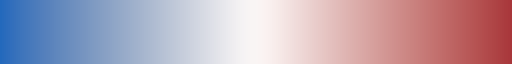

In [30]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.model_selection import train_test_split

sns.color_palette("vlag", as_cmap=True)

In [2]:
import warnings

def fxn():
    warnings.warn("deprecated", DeprecationWarning)

with warnings.catch_warnings():
    warnings.simplefilter("ignore")
    fxn()

In [3]:
pd.options.mode.chained_assignment = None

## Initial Data Exploration

In [4]:
df_30 = pd.read_csv('Data/features_30_sec.csv')

In [10]:
df_30 = df_30.set_index('filename')

In [11]:
df_30.head()

,length,chroma_stft_mean,chroma_stft_var,rms_mean,rms_var,spectral_centroid_mean,spectral_centroid_var,spectral_bandwidth_mean,spectral_bandwidth_var,rolloff_mean,...,mfcc16_var,mfcc17_mean,mfcc17_var,mfcc18_mean,mfcc18_var,mfcc19_mean,mfcc19_var,mfcc20_mean,mfcc20_var,label
filename,,,,,,,,,,,,,,,,,,,,,
blues.00000.wav,661794,0.350088,0.088757,0.130228,0.002827,1784.165850,129774.064525,2002.449060,85882.761315,3805.839606,...,52.420910,-1.690215,36.524071,-0.408979,41.597103,-2.303523,55.062923,1.221291,46.936035,blues
blues.00001.wav,661794,0.340914,0.094980,0.095948,0.002373,1530.176679,375850.073649,2039.036516,213843.755497,3550.522098,...,55.356403,-0.731125,60.314529,0.295073,48.120598,-0.283518,51.106190,0.531217,45.786282,blues
blues.00002.wav,661794,0.363637,0.085275,0.175570,0.002746,1552.811865,156467.643368,1747.702312,76254.192257,3042.260232,...,40.598766,-7.729093,47.639427,-1.816407,52.382141,-3.439720,46.639660,-2.231258,30.573025,blues
blues.00003.wav,661794,0.404785,0.093999,0.141093,0.006346,1070.106615,184355.942417,1596.412872,166441.494769,2184.745799,...,44.427753,-3.319597,50.206673,0.636965,37.319130,-0.619121,37.259739,-3.407448,31.949339,blues
blues.00004.wav,661794,0.308526,0.087841,0.091529,0.002303,1835.004266,343399.939274,1748.172116,88445.209036,3579.757627,...,86.099236,-5.454034,75.269707,-0.916874,53.613918,-4.404827,62.910812,-11.703234,55.195160,blues


In [12]:
df_30.describe()

,length,chroma_stft_mean,chroma_stft_var,rms_mean,rms_var,spectral_centroid_mean,spectral_centroid_var,spectral_bandwidth_mean,spectral_bandwidth_var,rolloff_mean,...,mfcc16_mean,mfcc16_var,mfcc17_mean,mfcc17_var,mfcc18_mean,mfcc18_var,mfcc19_mean,mfcc19_var,mfcc20_mean,mfcc20_var
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1.000000e+03,1000.000000,1000.000000,1000.000000,...,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,662030.846000,0.378682,0.086340,0.130930,0.003051,2201.780898,4.696916e+05,2242.541070,137079.155165,4571.549304,...,1.148144,60.730958,-3.966028,62.633624,0.507696,63.712586,-2.328761,66.231930,-1.095348,70.126096
std,1784.073992,0.081705,0.007735,0.065683,0.003634,715.960600,4.008995e+05,526.316473,96455.666326,1574.791602,...,4.578948,33.781951,4.549697,33.479172,3.869105,34.401977,3.755957,37.174631,3.837007,45.228512
min,660000.000000,0.171939,0.044555,0.005276,0.000004,570.040355,7.911251e+03,898.066208,10787.185064,749.140636,...,-15.693844,9.169314,-17.234728,13.931521,-11.963694,15.420555,-18.501955,13.487622,-19.929634,7.956583
25%,661504.000000,0.319562,0.082298,0.086657,0.000942,1627.697311,1.843505e+05,1907.240605,67376.554428,3380.069642,...,-1.863280,40.376442,-7.207225,40.830875,-2.007015,41.884240,-4.662925,41.710184,-3.368996,42.372865
50%,661794.000000,0.383148,0.086615,0.122443,0.001816,2209.263090,3.384862e+05,2221.392843,111977.548036,4658.524473,...,1.212809,52.325077,-4.065605,54.717674,0.669643,54.804890,-2.393862,57.423059,-1.166289,59.186117
75%,661794.000000,0.435942,0.091256,0.175682,0.003577,2691.294667,6.121479e+05,2578.469836,182371.576801,5533.810460,...,4.359662,71.691755,-0.838737,75.040838,3.119212,75.385832,0.150573,78.626444,1.312615,85.375374
max,675808.000000,0.663685,0.108111,0.397973,0.027679,4435.243901,3.036843e+06,3509.646417,694784.811549,8677.672688,...,13.457150,392.932373,11.482946,406.058868,15.388390,332.905426,14.694924,393.161987,15.369627,506.065155


In [25]:
df_30.values.shape

(1000, 59)

### Check data for missing values

In [19]:
print("Are there are any missing values?", 'Yes' if df_30.isnull().values.any() else 'No')
unique = df_30.nunique(axis=0)
total_null = df_30.isnull().sum()
print("Features with missing values", df_30.columns[df_30.isnull().any()].tolist() )

Are there are any missing values? No
Features with missing values []


### Do we need scaling?

### Explore the relationship between the target label and features

In [ ]:
# KDEs
# Boxplots
# PCA

In [28]:
corr_matrix = df_30.corr()

<AxesSubplot:>

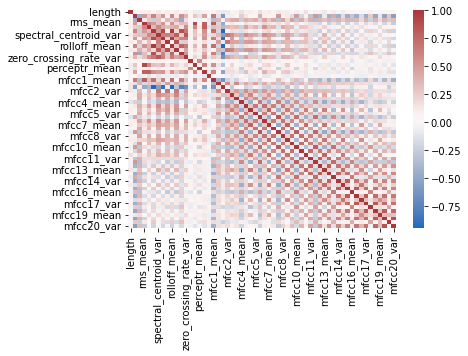

In [35]:
sns.heatmap(corr_matrix, cmap = 'vlag')

In [38]:
### cite : https://stackoverflow.com/questions/29294983/how-to-calculate-correlation-between-all-columns-and-remove-highly-correlated-on

###taken from the stackoverflow code on how to drop highly correlated feature columns
high = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(np.bool))
correlated_cols = [column for column in high.columns if any(high[column] > 0.90)]
correlated_cols
#df_30.drop(correlated_cols, axis=1, inplace=True)

/var/folders/fb/zq6dg17113xgxxv8rp10xvg00000gn/T/ipykernel_32694/323970381.py:4: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  high = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(np.bool))


['spectral_bandwidth_mean', 'rolloff_mean']

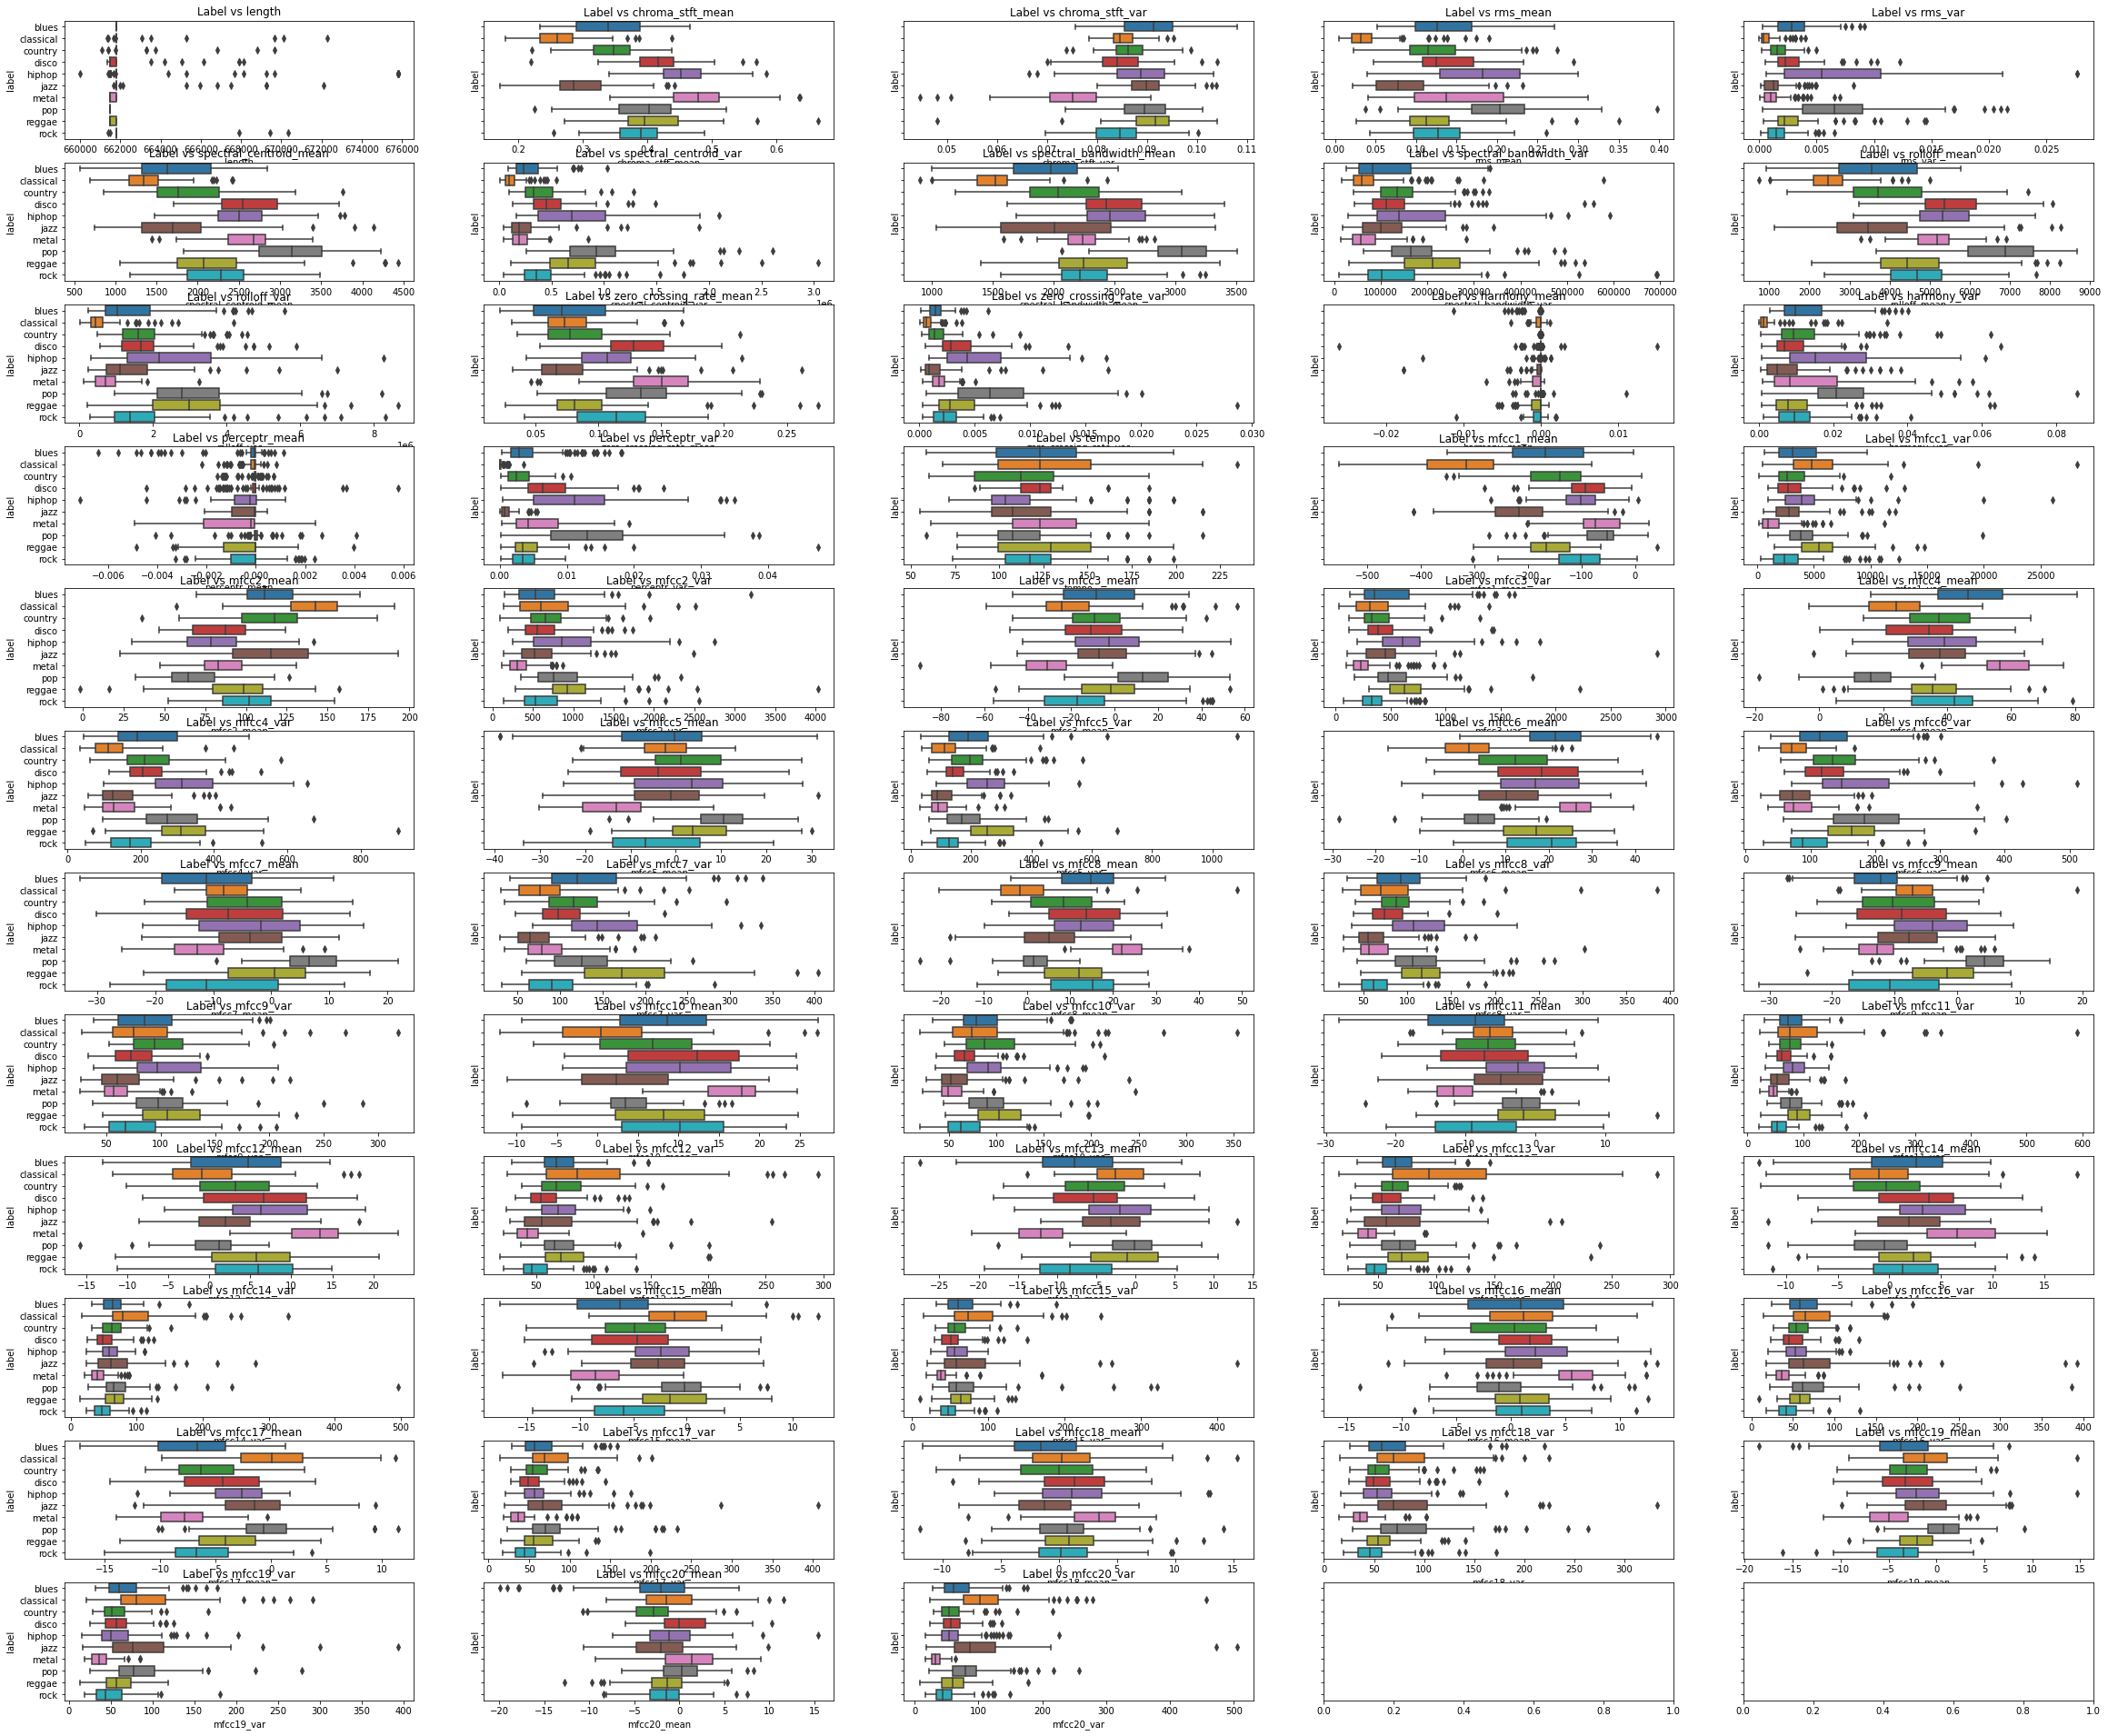

Text(0.5, 0.98, 'Relationship between the Label and 58.000000 features')

In [58]:
#code here

fig,ax = plt.subplots(12,5, figsize=(40,34), sharey=True)
ax = ax.ravel()
feature_list = list(df_30.columns)
feature_list.remove('label')
# print(feature_list)
for i in range(0, len(feature_list)):
    sns.boxplot(x = df_30[str(feature_list[i])], y = df_30['label'], data = df_30, ax = ax[i])
    ax[i].set_title("Label vs " + feature_list[i])
plt.show()
fig.suptitle('Relationship between the Label and %f features'%(len(feature_list)))

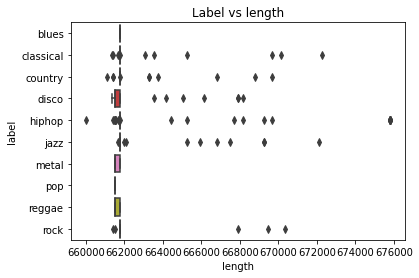

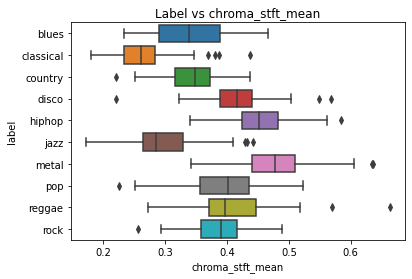

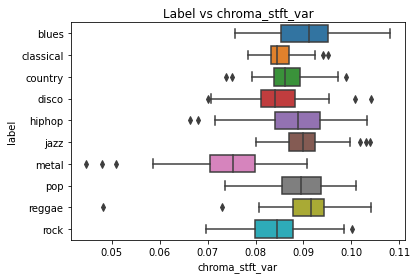

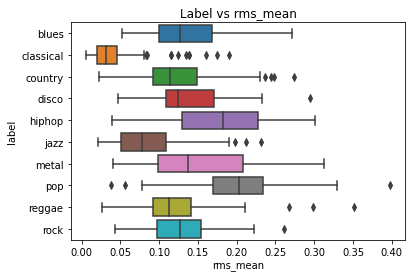

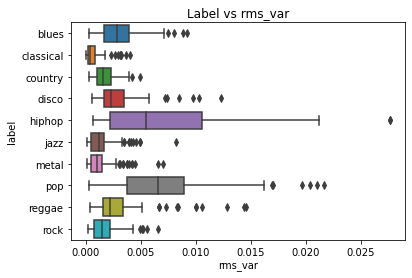

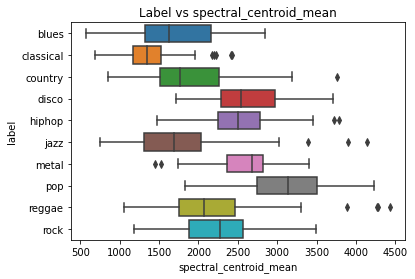

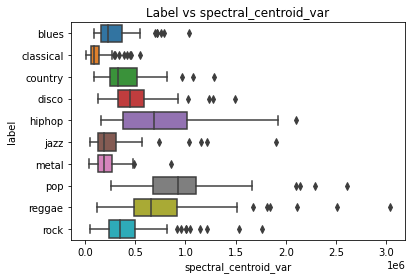

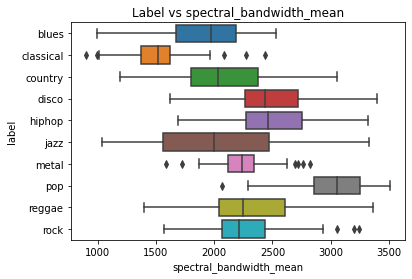

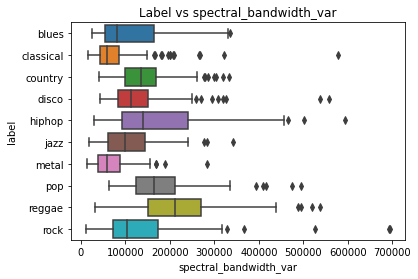

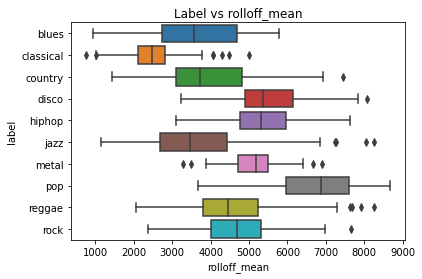

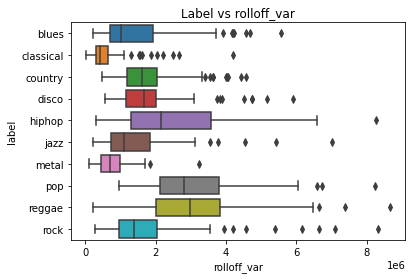

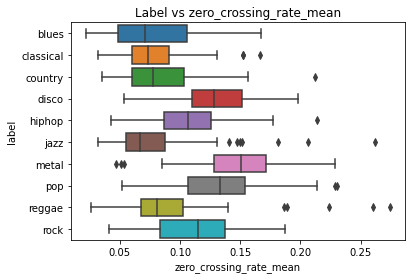

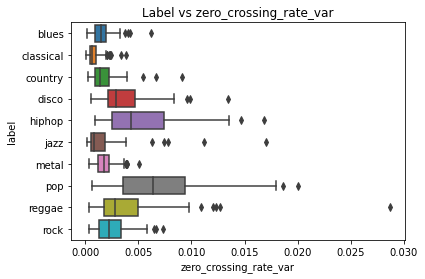

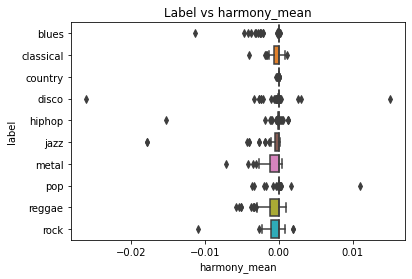

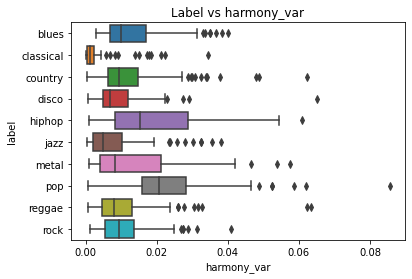

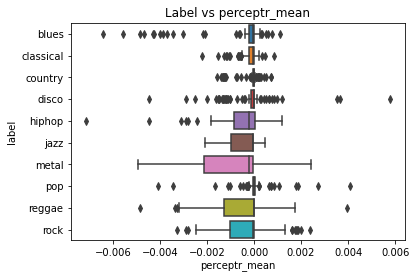

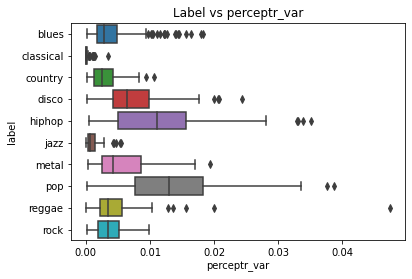

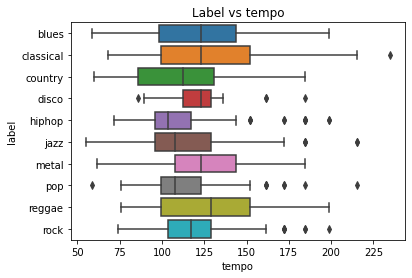

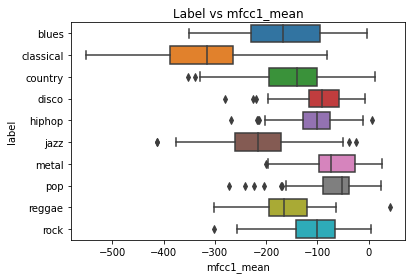

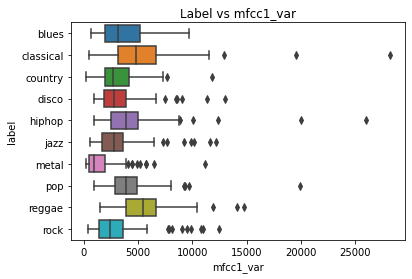

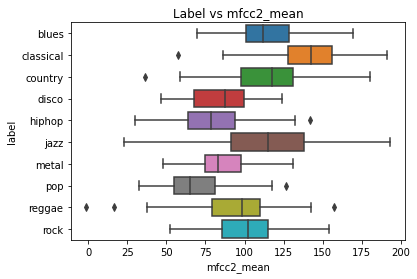

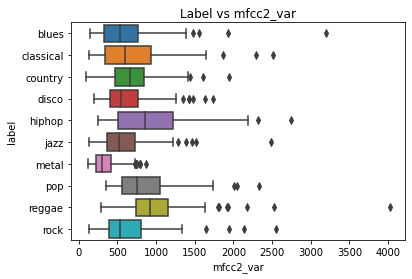

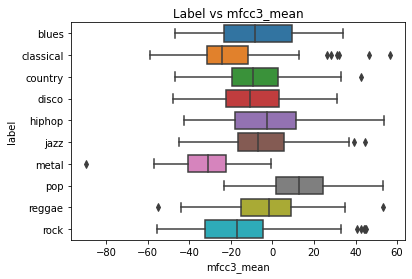

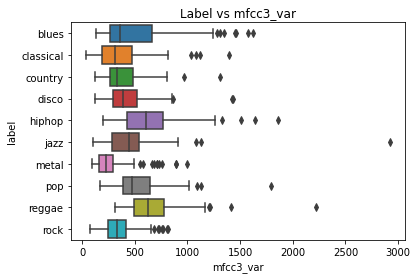

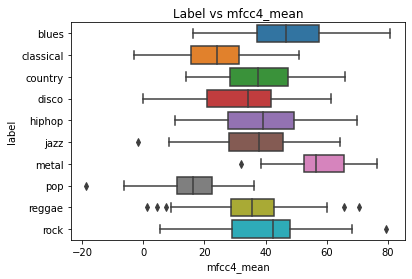

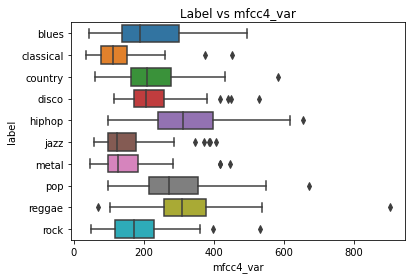

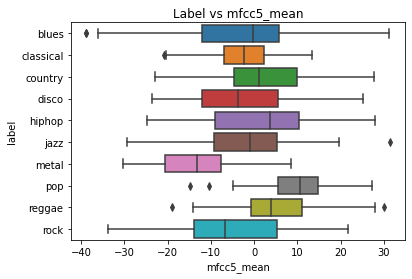

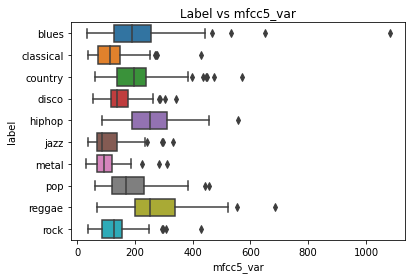

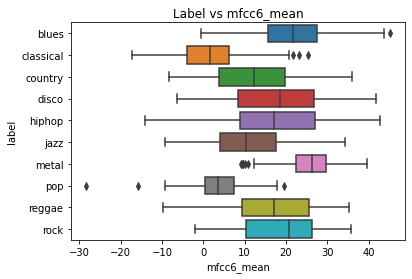

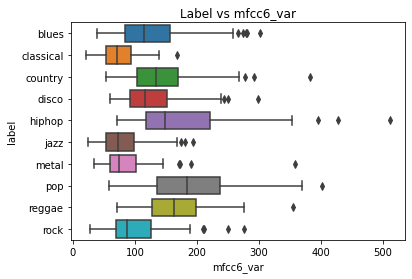

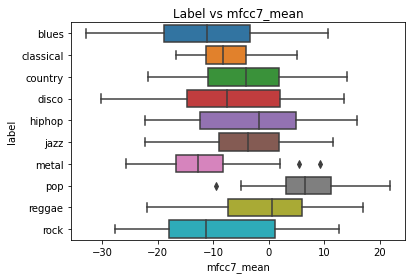

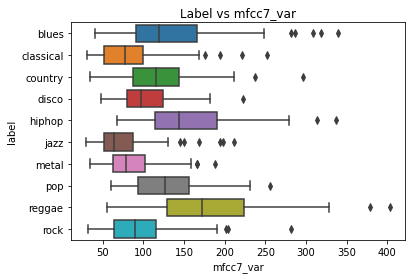

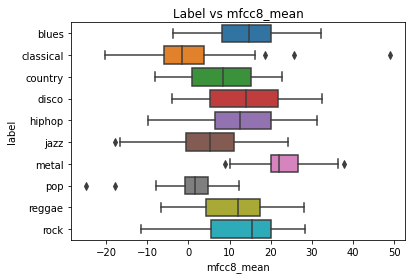

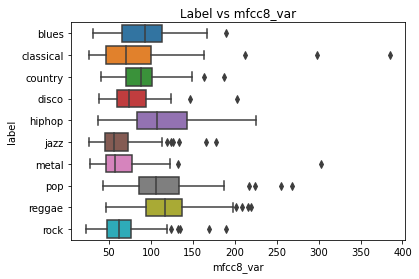

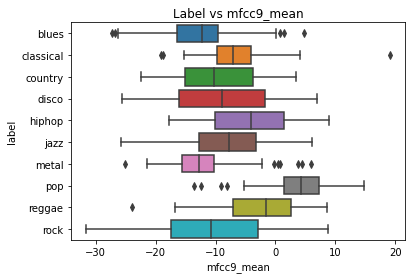

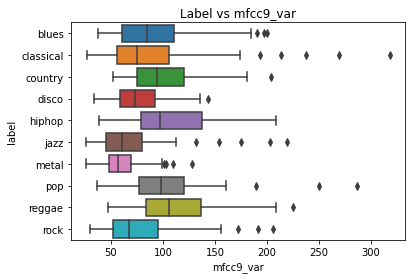

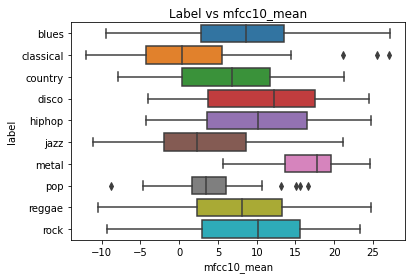

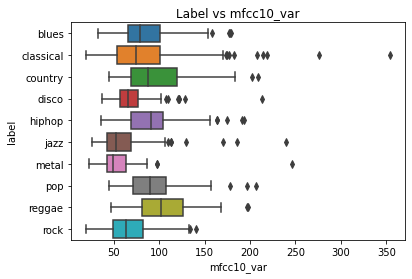

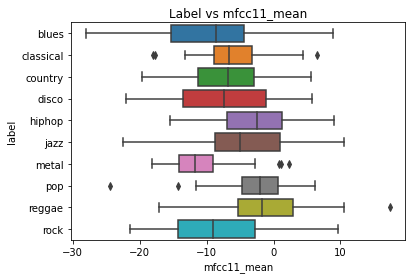

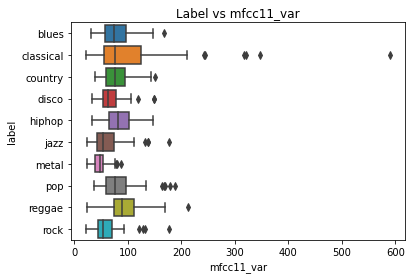

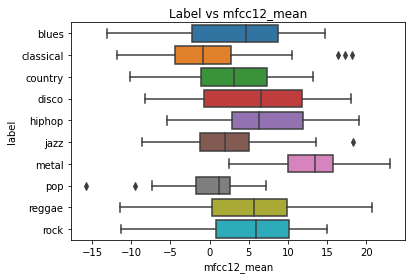

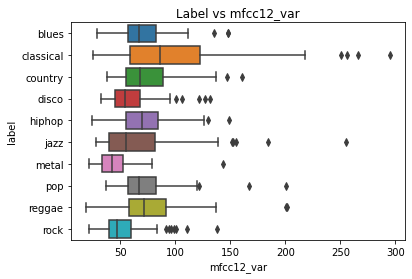

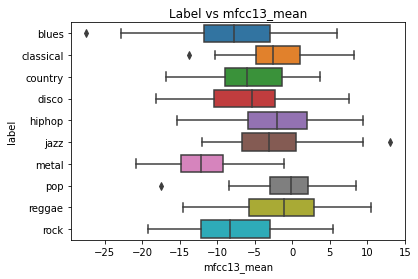

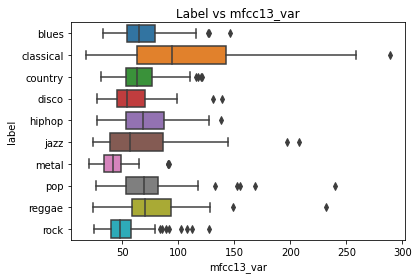

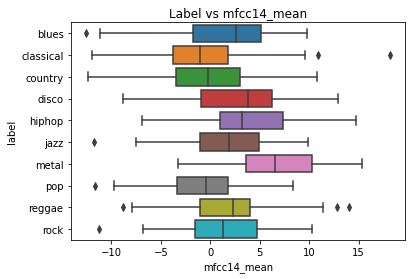

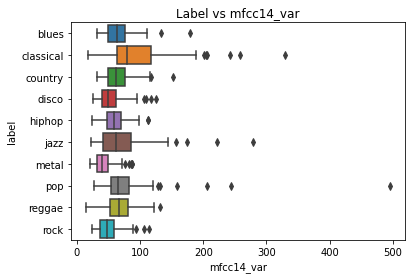

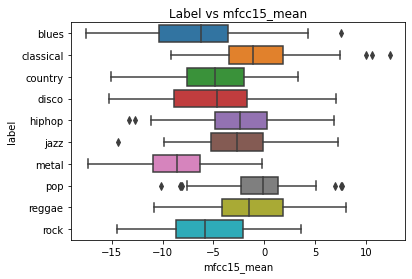

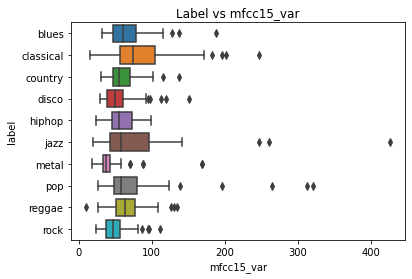

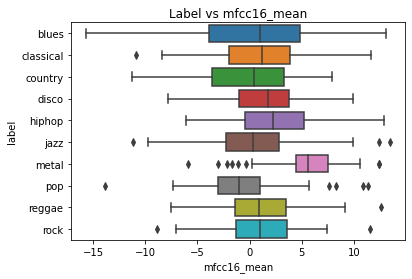

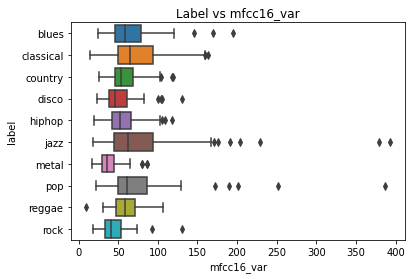

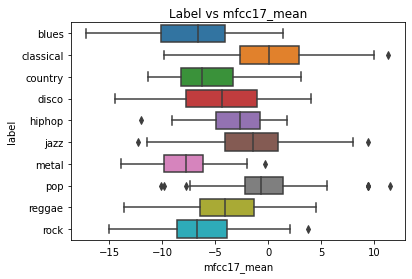

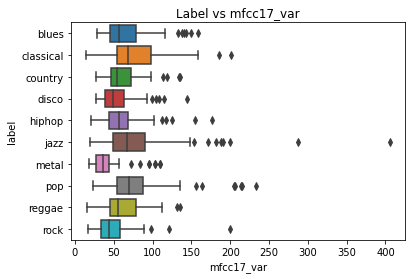

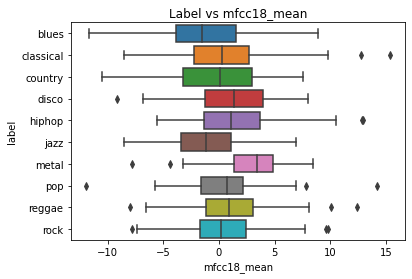

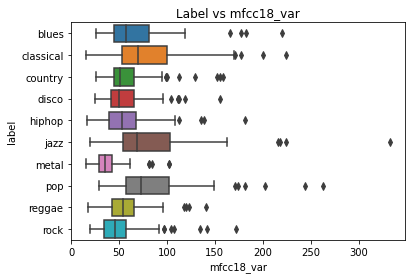

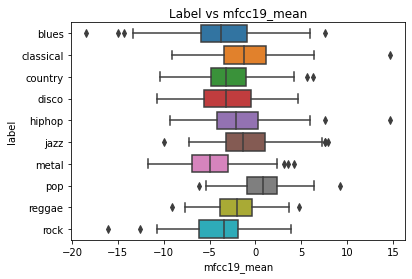

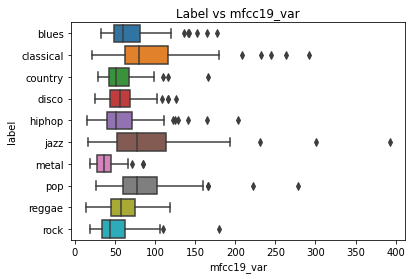

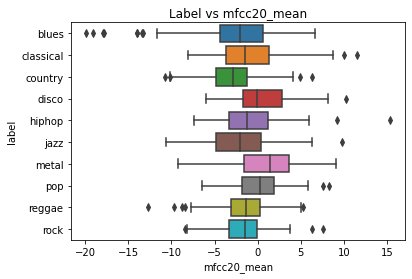

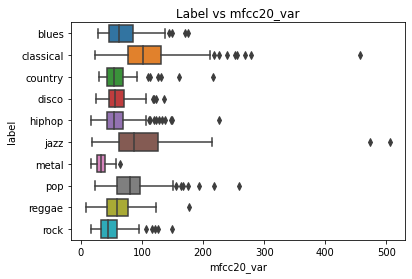

In [54]:
#code here

feature_list = list(df_30.columns)
feature_list.remove('label')
for i in range(0, len(feature_list)):
    sns.boxplot(x = df_30[str(feature_list[i])], y = df_30['label'], data = df_30)
    plt.title("Label vs " + feature_list[i])
    plt.show()


### soundwaves and spectograms for each label

**1.1. Plot z vs x and z vs y in the synthetic dataset as scatter plots. Label your axes and make sure your y-axis starts from 0. Do the independent and dependent features have linear relationship?**

(0.0, 97.87309383879494)

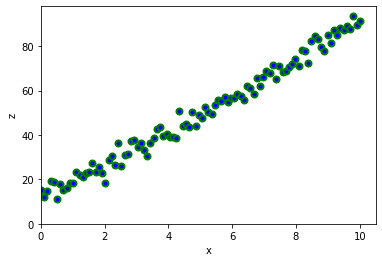

In [5]:
### Your code here

plt.scatter(x,z, c ="blue", 
            linewidths = 2, 
            marker ="o", 
            edgecolor ="green")

plt.xlabel("x")
plt.ylabel("z")
plt.xlim(0)
plt.ylim(0)

/var/folders/hk/fpn69pcx6jq8n7glwbj2pbp40000gn/T/ipykernel_53646/3488383683.py:3: UserWarning: You passed a edgecolor/edgecolors ('yellow') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  plt.scatter(y,z, c ="green",


(0.0, 97.87309383879494)

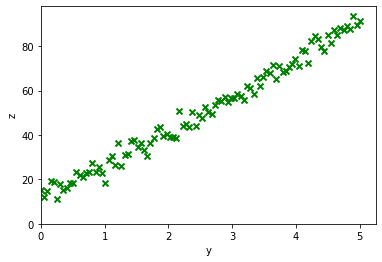

In [6]:
### Your code here

plt.scatter(y,z, c ="green", 
            linewidths = 2, 
            marker ="x", 
            edgecolor ="yellow")

plt.xlabel("y")
plt.ylabel("z")
plt.xlim(0)
plt.ylim(0)

**Ans 1.1** The independent and the dependent variables are linearly related as we can see from the above two scatterplots. The relation is positive linear relationship 

**1.2. Are the independent variables correlated? Use pearson correlation to verify? What would be the problem if linear regression is applied to correlated features?**

(0.0, 5.25)

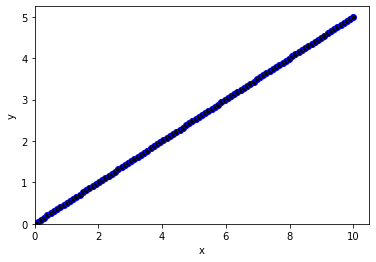

In [7]:
### Your code here

plt.scatter(x,y, c ="black", 
            linewidths = 1, 
            marker ="o", 
            edgecolor ="blue")

plt.xlabel("x")
plt.ylabel("y")
plt.xlim(0)
plt.ylim(0)

Covariance 
 [[8.58755909 4.29377955]
 [4.29377955 2.14688977]]
Correlation between the independent variables :
 [[1. 1.]
 [1. 1.]]
Pearson correlation :
 (0.9999999999999998, 0.0)


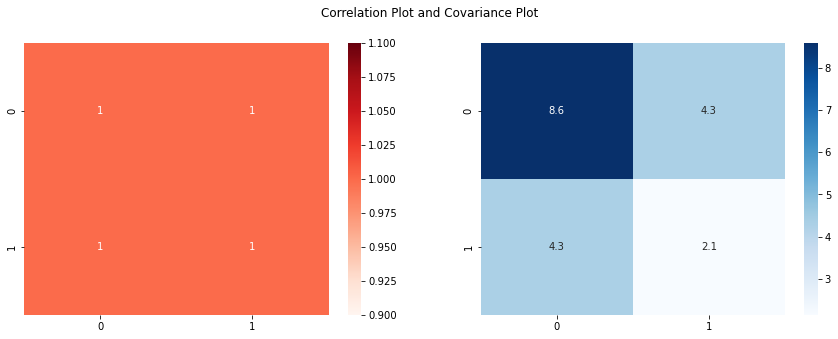

In [8]:
###verify with the help of pearson 

import scipy
covar = np.cov(x,y) ###cov
print("Covariance \n", covar)

corrn = np.corrcoef(x,y) ###finding correlation between two independent variables 
print("Correlation between the independent variables :\n", corrn)

pearson_cov = scipy.stats.pearsonr(x,y) ###pearson between independent features
print("Pearson correlation :\n", pearson_cov)

#plot the correlation and covariance
fig,(ax1,ax2) = plt.subplots(1, 2, figsize=(15,5))
fig.suptitle('Correlation Plot and Covariance Plot')
ax1 = sns.heatmap(corrn, annot=True, ax=ax1, annot_kws=dict(clip_on=True), cmap=plt.cm.Reds)
ax2 = sns.heatmap(covar, annot=True, ax=ax2, annot_kws=dict(clip_on=True), cmap=plt.cm.Blues)
plt.show()

**Ans :** The variables are indeed correlated as seen from the above values of correlation matrix. The correlation matrix and the pearson coefficient both shows the strong correlation, as we know that if r (coefficient) > 0.5 it signifies strong association between the features. Ideally, the independent variables should be independent but this strong correlation will effect the features such that even a slight change will effect the other correlated features, hence the problem of ***Multicollinearity*** might generate, which will eventually cause fluctuations in the model training hence leading to unstable model

**The second dataset we will be using is an auto MPG dataset. This dataset contains various characteristics for around 8128 cars. We will use linear regression to predict the selling_price label**

In [9]:
auto_mpg_df = pd.read_csv('Car details v3.csv')
# Dropping Torque column, there is information in this column but it will take some preprocessing.
# The idea of the exercise is to familarize yourself with the basics of Linear regression.
auto_mpg_df = auto_mpg_df.drop(['torque'], axis = 1)

In [10]:
auto_mpg_df

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,seats
0,Maruti Swift Dzire VDI,2014,450000,145500,Diesel,Individual,Manual,First Owner,23.4 kmpl,1248 CC,74 bhp,5.0
1,Skoda Rapid 1.5 TDI Ambition,2014,370000,120000,Diesel,Individual,Manual,Second Owner,21.14 kmpl,1498 CC,103.52 bhp,5.0
2,Honda City 2017-2020 EXi,2006,158000,140000,Petrol,Individual,Manual,Third Owner,17.7 kmpl,1497 CC,78 bhp,5.0
3,Hyundai i20 Sportz Diesel,2010,225000,127000,Diesel,Individual,Manual,First Owner,23.0 kmpl,1396 CC,90 bhp,5.0
4,Maruti Swift VXI BSIII,2007,130000,120000,Petrol,Individual,Manual,First Owner,16.1 kmpl,1298 CC,88.2 bhp,5.0
...,...,...,...,...,...,...,...,...,...,...,...,...
8123,Hyundai i20 Magna,2013,320000,110000,Petrol,Individual,Manual,First Owner,18.5 kmpl,1197 CC,82.85 bhp,5.0
8124,Hyundai Verna CRDi SX,2007,135000,119000,Diesel,Individual,Manual,Fourth & Above Owner,16.8 kmpl,1493 CC,110 bhp,5.0
8125,Maruti Swift Dzire ZDi,2009,382000,120000,Diesel,Individual,Manual,First Owner,19.3 kmpl,1248 CC,73.9 bhp,5.0
8126,Tata Indigo CR4,2013,290000,25000,Diesel,Individual,Manual,First Owner,23.57 kmpl,1396 CC,70 bhp,5.0


**1.3. Missing Value analysis - Auto mpg dataset.**

**Are there any missing values in the dataset? If so, what can be done about it? Jusify your approach.**

In [11]:
### Your code here

print("Are there are any null values :", auto_mpg_df.isnull().values.any())
unique = auto_mpg_df.nunique(axis=0)
total_null = auto_mpg_df.isnull().sum()
print("NaN values features", auto_mpg_df.columns[auto_mpg_df.isnull().any()].tolist() )

Are there are any null values : True
NaN values features ['mileage', 'engine', 'max_power', 'seats']


In [12]:
###some basic information of the dataset, also to figure out how many of them are categorical or numerical

df = auto_mpg_df  ###for my own ease
df.info()
print("Categorical:", list(df.select_dtypes(include=['object']).columns))
print("Numerical:", list(df.select_dtypes(exclude=['object']).columns))
print("\n")
t1 = pd.concat([unique, total_null],axis =1, keys  =['unique','total_null'])
t1

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8128 entries, 0 to 8127
Data columns (total 12 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   name           8128 non-null   object 
 1   year           8128 non-null   int64  
 2   selling_price  8128 non-null   int64  
 3   km_driven      8128 non-null   int64  
 4   fuel           8128 non-null   object 
 5   seller_type    8128 non-null   object 
 6   transmission   8128 non-null   object 
 7   owner          8128 non-null   object 
 8   mileage        7907 non-null   object 
 9   engine         7907 non-null   object 
 10  max_power      7913 non-null   object 
 11  seats          7907 non-null   float64
dtypes: float64(1), int64(3), object(8)
memory usage: 762.1+ KB
Categorical: ['name', 'fuel', 'seller_type', 'transmission', 'owner', 'mileage', 'engine', 'max_power']
Numerical: ['year', 'selling_price', 'km_driven', 'seats']




,unique,total_null
name,2058,0
year,29,0
selling_price,677,0
km_driven,921,0
fuel,4,0
seller_type,3,0
transmission,2,0
owner,5,0
mileage,393,221
engine,121,221


**Ans :** Yes, there are a couple of columns(features) that have missing values in them. 
They are ['mileage', 'engine', 'max_power', 'seats']. 
There are a couple of approaches that are used to deal with the missing dataset which depends on the type of the feature. For instance for the categorical features we can either drop the rows, or the missing data, impute it etc, whereas for the numerical features, replacing the missing data with the mean/mode/median depending on the type of the values of the features. Dropping the features definitly causes the effect on the accuracy of the models unless the feature is of not much importance like "name", hence it is better to approach categorical features by encoding them, and converting them to the numerical features and then imputing/standardizing them

**1.4. The features engine, max_power and mileage have units in the dataset. In the real world if we have such datasets, we generally remove the units from each feature. After doing so, convert the datatype of these columns to float. For example: 1248 CC engine is 1248, 23.4 kmpl is 23.4 and so on.**

**Hint: Check for distinct units in each of these features. A feature might have multiple units as well. Also, a feature could have no value but have unit. For example 'CC' without any value. Remove such rows.**

In [13]:
### Your code here

##split the string in two and check for the units by using unique

df[['engine','eunit']] = auto_mpg_df["engine"].str.split(" ", expand=True)
df[['mileage','munit']] = auto_mpg_df["mileage"].str.split(" ", expand=True)
df[['max_power','punit']] = auto_mpg_df["max_power"].str.split(" ", expand=True)

print("Engine Units : ",df['eunit'].unique())
print("Mileage Units : ",df['munit'].unique())
print("Max Power Units : ",df['punit'].unique())

Engine Units :  ['CC' nan]
Mileage Units :  ['kmpl' 'km/kg' nan]
Max Power Units :  ['bhp' nan None]


***Now we know which of these have multiple units, so we can replace the units and keep the numerical values and convert to float***

In [14]:
# replace the units with the "" 

auto_mpg_df['engine'] = auto_mpg_df["engine"].replace(' CC','',regex=True)
auto_mpg_df['mileage'] = auto_mpg_df["mileage"].replace(' kmpl','',regex=True)
auto_mpg_df['mileage'] = auto_mpg_df["mileage"].replace(' km/kg','',regex=True)
auto_mpg_df['max_power'] = auto_mpg_df["max_power"].replace(' bhp','',regex=True)

In [15]:
#check for null values

print("Null values in Engine", auto_mpg_df['engine'].isnull().sum())
print("Null values in Mileage", auto_mpg_df['mileage'].isnull().sum())
print("Null values in Max_Power", auto_mpg_df['max_power'].isnull().sum())

Null values in Engine 221
Null values in Mileage 221
Null values in Max_Power 215


In [16]:
auto_mpg_df['engine'] = pd.to_numeric(auto_mpg_df['engine'], errors="raise")
auto_mpg_df['mileage'] = pd.to_numeric(auto_mpg_df['mileage'], errors="raise")
auto_mpg_df['max_power'] = pd.to_numeric(auto_mpg_df['max_power'], errors="raise")

In [17]:
##drop extra unit columns

auto_mpg_df = auto_mpg_df.drop(columns=['eunit','punit','munit'])
auto_mpg_df

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,seats
0,Maruti Swift Dzire VDI,2014,450000,145500,Diesel,Individual,Manual,First Owner,23.40,1248.0,74.00,5.0
1,Skoda Rapid 1.5 TDI Ambition,2014,370000,120000,Diesel,Individual,Manual,Second Owner,21.14,1498.0,103.52,5.0
2,Honda City 2017-2020 EXi,2006,158000,140000,Petrol,Individual,Manual,Third Owner,17.70,1497.0,78.00,5.0
3,Hyundai i20 Sportz Diesel,2010,225000,127000,Diesel,Individual,Manual,First Owner,23.00,1396.0,90.00,5.0
4,Maruti Swift VXI BSIII,2007,130000,120000,Petrol,Individual,Manual,First Owner,16.10,1298.0,88.20,5.0
...,...,...,...,...,...,...,...,...,...,...,...,...
8123,Hyundai i20 Magna,2013,320000,110000,Petrol,Individual,Manual,First Owner,18.50,1197.0,82.85,5.0
8124,Hyundai Verna CRDi SX,2007,135000,119000,Diesel,Individual,Manual,Fourth & Above Owner,16.80,1493.0,110.00,5.0
8125,Maruti Swift Dzire ZDi,2009,382000,120000,Diesel,Individual,Manual,First Owner,19.30,1248.0,73.90,5.0
8126,Tata Indigo CR4,2013,290000,25000,Diesel,Individual,Manual,First Owner,23.57,1396.0,70.00,5.0


In [18]:
###verify datatype of the mileage, max_power and mileage

print("Data Type of mileage:", auto_mpg_df['mileage'].dtypes)
print("Data Type of mileage:", auto_mpg_df['engine'].dtypes)
print("Data Type of mileage:", auto_mpg_df['max_power'].dtypes)

Data Type of mileage: float64
Data Type of mileage: float64
Data Type of mileage: float64


In [19]:
auto_mpg_df = auto_mpg_df.dropna(how='any',axis=0)

In [20]:
print(auto_mpg_df.isnull().any())
auto_mpg_df.shape

name             False
year             False
selling_price    False
km_driven        False
fuel             False
seller_type      False
transmission     False
owner            False
mileage          False
engine           False
max_power        False
seats            False
dtype: bool


(7906, 12)

In [21]:
auto_mpg_X = auto_mpg_df.drop(columns=['selling_price'])
auto_mpg_y = auto_mpg_df['selling_price']

**1.5. Plot the distribution of the label (selling_price) using a histogram. Make multiple plots with different binwidths. Make sure to label your axes while plotting.**

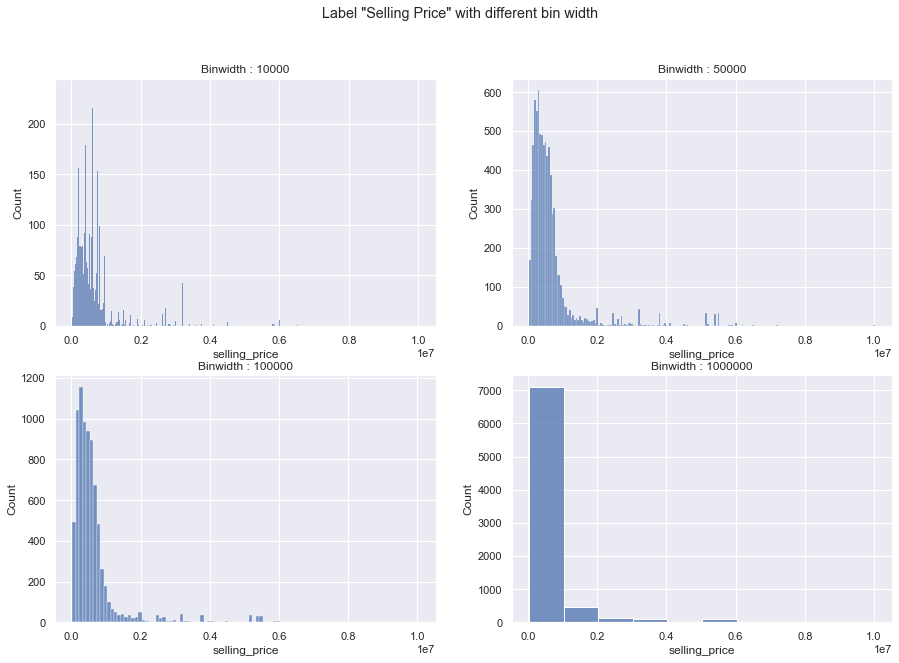

In [22]:
### Your code here

sns.set(rc={'figure.figsize':(11.7,8.27)})  ##cite : stackoverflow "how to change figure size of sns article"

fig,ax = plt.subplots(2, 2, figsize=(15,10))
fig.suptitle('Label "Selling Price" with different bin width')
ax = ax.ravel()
binsize =[10000,50000,100000,1000000]
for i in range(0,len(binsize)):
    sns.histplot(ax=ax[i],data=auto_mpg_y,x=auto_mpg_y,binwidth=binsize[i])
    ax[i].set_title("Binwidth : " + str(binsize[i]))
plt.show()

**1.6. Plot the relationships between the label (Selling Price) and the continuous features (Mileage, km driven, engine, max power) using a small multiple of scatter plots. 
Make sure to label the axes. Do you see something interesting about the distributions of these features.**

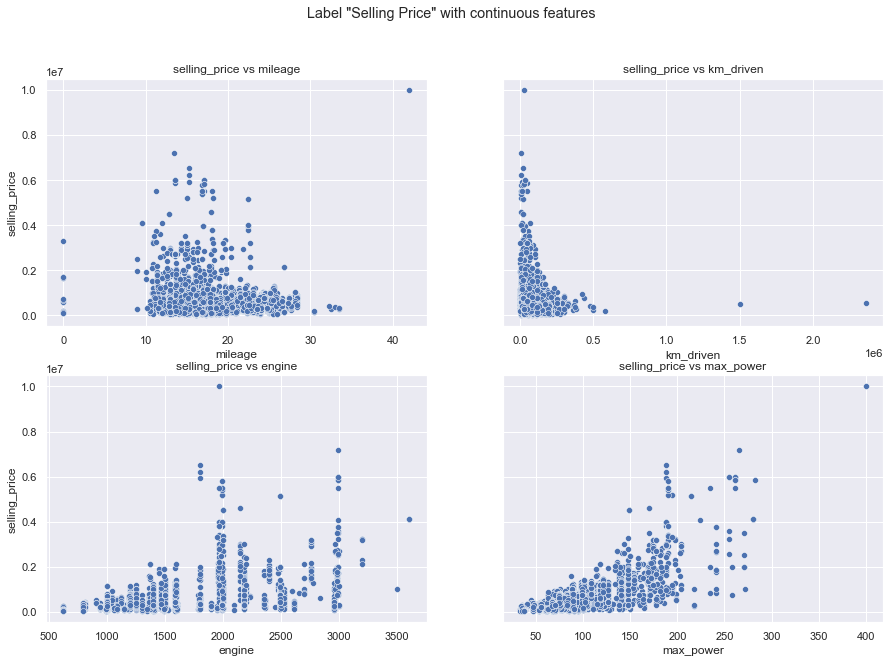

In [23]:
### Your code here

fig,ax = plt.subplots(2, 2, figsize=(15,10), sharey=True)
ax = ax.ravel()
fig.suptitle('Label "Selling Price" with continuous features')
cfeatures = ['mileage','km_driven','engine','max_power']
for i in range(0,len(cfeatures)):
    sns.scatterplot(x=auto_mpg_X[str(cfeatures[i])],y=auto_mpg_y, data=auto_mpg_X, ax=ax[i])
    ax[i].set_title("selling_price vs " + cfeatures[i])
plt.show()

**1.7. Plot the relationships between the label (Selling Price) and the discrete features (fuel type, Seller type, transmission) using a small multiple of box plots. Make sure to label the axes.**

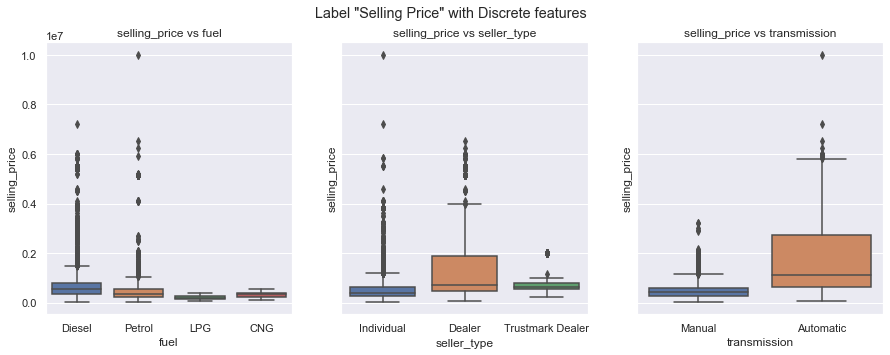

In [24]:
### Your code here

fig,ax = plt.subplots(1,3, figsize=(15,5), sharey=True)
ax = ax.ravel()
fig.suptitle('Label "Selling Price" with Discrete features')
dfeatures = ['fuel','seller_type','transmission']
for i in range(0,len(dfeatures)):
    sns.boxplot(x=auto_mpg_X[str(dfeatures[i])],y =auto_mpg_y, data=auto_mpg_X, ax=ax[i])
    ax[i].set_title("selling_price vs " + dfeatures[i])
plt.show()

**1.8. From the visualizations above, do you think linear regression is a good model for this problem? Why and/or why not?**

### Your answer here
 
Yes, the linear regression can be a good choice of model for this dataset, since most of the features are falling in the same line, there are a couple of outliers but they can be removed or data can be standardized.

In [25]:
auto_mpg_X['year'] =  2020 - auto_mpg_X['year']

In [26]:
#dropping the car name as it is irrelevant.
auto_mpg_X.drop(['name'],axis = 1,inplace=True)

#check out the dataset with new changes
auto_mpg_X.head()

,year,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,seats
0,6,145500,Diesel,Individual,Manual,First Owner,23.40,1248.0,74.00,5.0
1,6,120000,Diesel,Individual,Manual,Second Owner,21.14,1498.0,103.52,5.0
2,14,140000,Petrol,Individual,Manual,Third Owner,17.70,1497.0,78.00,5.0
3,10,127000,Diesel,Individual,Manual,First Owner,23.00,1396.0,90.00,5.0
4,13,120000,Petrol,Individual,Manual,First Owner,16.10,1298.0,88.20,5.0


**Data Pre-processing**

**1.9.
Before we can fit a linear regression model, there are several pre-processing steps we should apply to the datasets:**
1. Encode categorial features appropriately.
2. Split the dataset into training (60%), validation (20%), and test (20%) sets.
3. Standardize the columns in the feature matrices X_train, X_val, and X_test to have zero mean and unit variance. To avoid information leakage, learn the standardization parameters (mean, variance) from X_train, and apply it to X_train, X_val, and X_test.
4. Add a column of ones to the feature matrices X_train, X_val, and X_test. This is a common trick so that we can learn a coefficient for the bias term of a linear model.


In [27]:
# 1. No categorical features in the synthetic dataset (skip this step)

# 2. Split the dataset into training (60%), validation (20%), and test (20%) sets

# 3. Standardize the columns in the feature matrices

# 4. Add a column of ones to the feature matrices


In [28]:
## we see 4 categorical features hence we can one hot encode them step 1

from sklearn.preprocessing import OneHotEncoder

auto_mpg_X_encoded = auto_mpg_X.copy()
auto_mpg_X_encoded=pd.get_dummies(auto_mpg_X_encoded, columns=['seller_type'])
auto_mpg_X_encoded=pd.get_dummies(auto_mpg_X_encoded, columns=['fuel'])
auto_mpg_X_encoded=pd.get_dummies(auto_mpg_X_encoded, columns=['transmission'])
auto_mpg_X_encoded=pd.get_dummies(auto_mpg_X_encoded, columns=['owner'])
auto_mpg_X_encoded.head()

,year,km_driven,mileage,engine,max_power,seats,seller_type_Dealer,seller_type_Individual,seller_type_Trustmark Dealer,fuel_CNG,fuel_Diesel,fuel_LPG,fuel_Petrol,transmission_Automatic,transmission_Manual,owner_First Owner,owner_Fourth & Above Owner,owner_Second Owner,owner_Test Drive Car,owner_Third Owner
0,6,145500,23.40,1248.0,74.00,5.0,0,1,0,0,1,0,0,0,1,1,0,0,0,0
1,6,120000,21.14,1498.0,103.52,5.0,0,1,0,0,1,0,0,0,1,0,0,1,0,0
2,14,140000,17.70,1497.0,78.00,5.0,0,1,0,0,0,0,1,0,1,0,0,0,0,1
3,10,127000,23.00,1396.0,90.00,5.0,0,1,0,0,1,0,0,0,1,1,0,0,0,0
4,13,120000,16.10,1298.0,88.20,5.0,0,1,0,0,0,0,1,0,1,1,0,0,0,0


In [29]:
### step 2, split them

from sklearn.model_selection import train_test_split

auto_mpg_y = np.log(auto_mpg_y.to_numpy())
X_dev, X_test, y_dev, y_test = train_test_split(auto_mpg_X_encoded, auto_mpg_y, test_size=0.2, shuffle = True) #test
X_train, X_val, y_train, y_val = train_test_split(X_dev, y_dev, test_size=0.25, shuffle = True) #val

In [30]:
### step 3 standardize in the feature matrices

from sklearn.preprocessing import StandardScaler

###standardize the dataset 
###cite : https://stackoverflow.com/questions/24645153/pandas-dataframe-columns-scaling-with-sklearn and https://www.kaggle.com/viswanathanc/auto-mpg-linear-regression
ta1 = X_train.columns
ta2 = X_test.columns
ta3 = X_val.columns
X_train[ta1] = StandardScaler().fit_transform(X_train[ta1])
X_test[ta2] = StandardScaler().fit_transform(X_test[ta2])
X_val[ta3] = StandardScaler().fit_transform(X_val[ta3])

In [31]:
print("testing standardizing on X_train:", X_train)

testing standardizing on X_train:           year  km_driven   mileage    engine  max_power     seats  \
7399  1.279192   0.760890 -0.379587 -0.426827  -0.468145 -0.444514   
3473 -0.268039   0.069588  0.452458 -0.136192  -0.090122 -0.444514   
2969 -0.783782  -0.155486 -0.291228 -0.528942  -0.143260 -0.444514   
598   0.247705   0.746485  1.583942  0.064111   0.181625 -0.444514   
6278 -0.783782   0.149972  1.502947 -0.426827  -0.096455  1.613396   
...        ...        ...       ...       ...        ...       ...   
3749 -1.041654  -0.477022 -0.733022  1.401426   1.321475  1.613396   
18    3.084294   0.166049  0.086751 -1.314443  -1.258331 -0.444514   
711  -0.010167   0.326817 -1.415349  2.029827  -0.539730  3.671305   
2148  1.279192   0.326817 -1.655881  0.236921   0.311028 -0.444514   
3417  0.247705   0.155245 -1.560159  2.020008   0.236690  1.613396   

      seller_type_Dealer  seller_type_Individual  \
7399           -0.401344                0.454155   
3473           -0.401

In [32]:
### step 4 add bias as one more col this will make the size as mxn where n = 21
X_train['bias']=1
X_test['bias']=1
X_val['bias']=1

In [33]:
print("Train shape:",X_train.shape)
print("Test shape:", X_test.shape)
print("Val shape:", X_val.shape)

Train shape: (4743, 21)
Test shape: (1582, 21)
Val shape: (1581, 21)


**At the end of this pre-processing, you should have the following vectors and matrices:**

**- Auto MPG dataset: auto_mpg_X_train, auto_mpg_X_val, auto_mpg_X_test, auto_mpg_y_train, auto_mpg_y_val, auto_mpg_y_test**

**Implement Linear Regression**

Now, we can implement our linear regression model! Specifically, we will be implementing ridge regression, which is linear regression with L2 regularization. Given an (m x n) feature matrix $X$, an (m x 1) label vector $y$, and an (n x 1) weight vector $w$, the hypothesis function for linear regression is:

$$
y = X w
$$

Note that we can omit the bias term here because we have included a column of ones in our $X$ matrix, so the bias term is learned implicitly as a part of $w$. This will make our implementation easier.

Our objective in linear regression is to learn the weights $w$ which best fit the data. This notion can be formalized as finding the optimal $w$ which minimizes the following loss function:

$$
\min_{w} \| X w - y \|^2_2 + \alpha \| w \|^2_2 \\
$$

This is the ridge regression loss function. The $\| X w - y \|^2_2$ term penalizes predictions $Xw$ which are not close to the label $y$. And the $\alpha \| w \|^2_2$ penalizes large weight values, to favor a simpler, more generalizable model. The $\alpha$ hyperparameter, known as the regularization parameter, is used to tune the complexity of the model - a higher $\alpha$ results in smaller weights and lower complexity, and vice versa. Setting $\alpha = 0$ gives us vanilla linear regression.

Conveniently, ridge regression has a closed-form solution which gives us the optimal $w$ without having to do iterative methods such as gradient descent. The closed-form solution, known as the Normal Equations, is given by:

$$
w = (X^T X + \alpha I)^{-1} X^T y
$$

**1.10. Implement a `LinearRegression` class with two methods: `train` and `predict`. You may NOT use sklearn for this implementation. You may, however, use `np.linalg.solve` to find the closed-form solution. It is highly recommended that you vectorize your code.**

In [34]:
class LinearRegression():
    '''
    Linear regression model with L2-regularization (i.e. ridge regression).

    Attributes
    ----------
    alpha: regularization parameter
    w: (n x 1) weight vector
    '''
    
    def __init__(self, alpha=0):
        self.alpha = alpha
        self.w = None

    def train(self, X, y):
        '''Trains model using ridge regression closed-form solution 
        (sets w to its optimal value).
        
        Parameters
        ----------
        X : (m x n) feature matrix
        y: (m x 1) label vector
        
        Returns
        -------
        None
        '''
        
        m = X.shape[0]
        n = X.shape[1]
        I = np.identity(n)
        xtx = np.dot(np.transpose(X),X)
        xy = np.dot(np.transpose(X),y)
        I_alpha = self.alpha * I
        xtx_dash = xtx + I_alpha
        self.w = np.dot(np.linalg.pinv(xtx_dash),xy)
        return self.w
        
    def predict(self, X):
        '''Predicts on X using trained model.
        
        Parameters
        ----------
        X : (m x n) feature matrix
        
        Returns
        -------
        y_pred: (m x 1) prediction vector
        '''
        ### Your code here
        y_pred=np.dot(X,self.w)
        return y_pred

**Train, Evaluate, and Interpret Linear Regression Model**

**1.11. A) Train a linear regression model ($\alpha = 0$) on the auto MPG training data. Make predictions and report the mean-squared error (MSE) on the training, validation, and test sets. Report the first 5 predictions on the test set, along with the actual labels.**

In [35]:
### Your code here

from sklearn.metrics import mean_squared_error
linreg = LinearRegression()
trained_model = linreg.train(X_train, y_train)
y_train_pred = linreg.predict(X_train)
y_test_pred = linreg.predict(X_test)
y_val_pred = linreg.predict(X_val)

mse_autompg_train = mean_squared_error(y_train,y_train_pred)
mse_autompg_val = mean_squared_error(y_val,y_val_pred)
mse_autompg_test = mean_squared_error(y_test,y_test_pred)

print("MSE for train:", mse_autompg_train)
print("MSE for test:", mse_autompg_test)
print("MSE for val:", mse_autompg_val)

MSE for train: 0.08804647489669777
MSE for test: 0.08725512129193258
MSE for val: 0.08933486122282071


**B) As a baseline model, use the mean of the training labels (auto_mpg_y_train) as the prediction for all instances. Report the mean-squared error (MSE) on the training, validation, and test sets using this baseline. This is a common baseline used in regression problems and tells you if your model is any good. Your linear regression MSEs should be much lower than these baseline MSEs.**

In [36]:
### Your code here

bse_y_train=[]
bse_y_val=[]
bse_y_test=[]

for i in y_train_pred:
    out = i - y_train
    bse_y_train.append(out)
bse_y_train_mean = np.square(bse_y_train).mean()

for i in y_val_pred:
    out = i - y_val
    bse_y_val.append(out)
bse_y_val_mean = np.square(bse_y_val).mean()

for i in y_test_pred:
    out = i - y_test
    bse_y_test.append(out)
bse_y_test_mean = np.square(bse_y_test).mean()

print("Baseline MSE on y_train :", bse_y_train_mean)
print("Baseline MSE on y_val :", bse_y_val_mean)
print("Baseline MSE on y_test :", bse_y_test_mean)

Baseline MSE on y_train : 1.2958777592361335
Baseline MSE on y_val : 1.2995664075132962
Baseline MSE on y_test : 1.2624482513007655


**1.12. Interpret your model trained on the auto MPG dataset using a bar chart of the model weights. Make sure to label the bars (x-axis) and don't forget the bias term! Use lecture 3, slide 15 as a reference. According to your model, which features are the greatest contributors to the selling price**

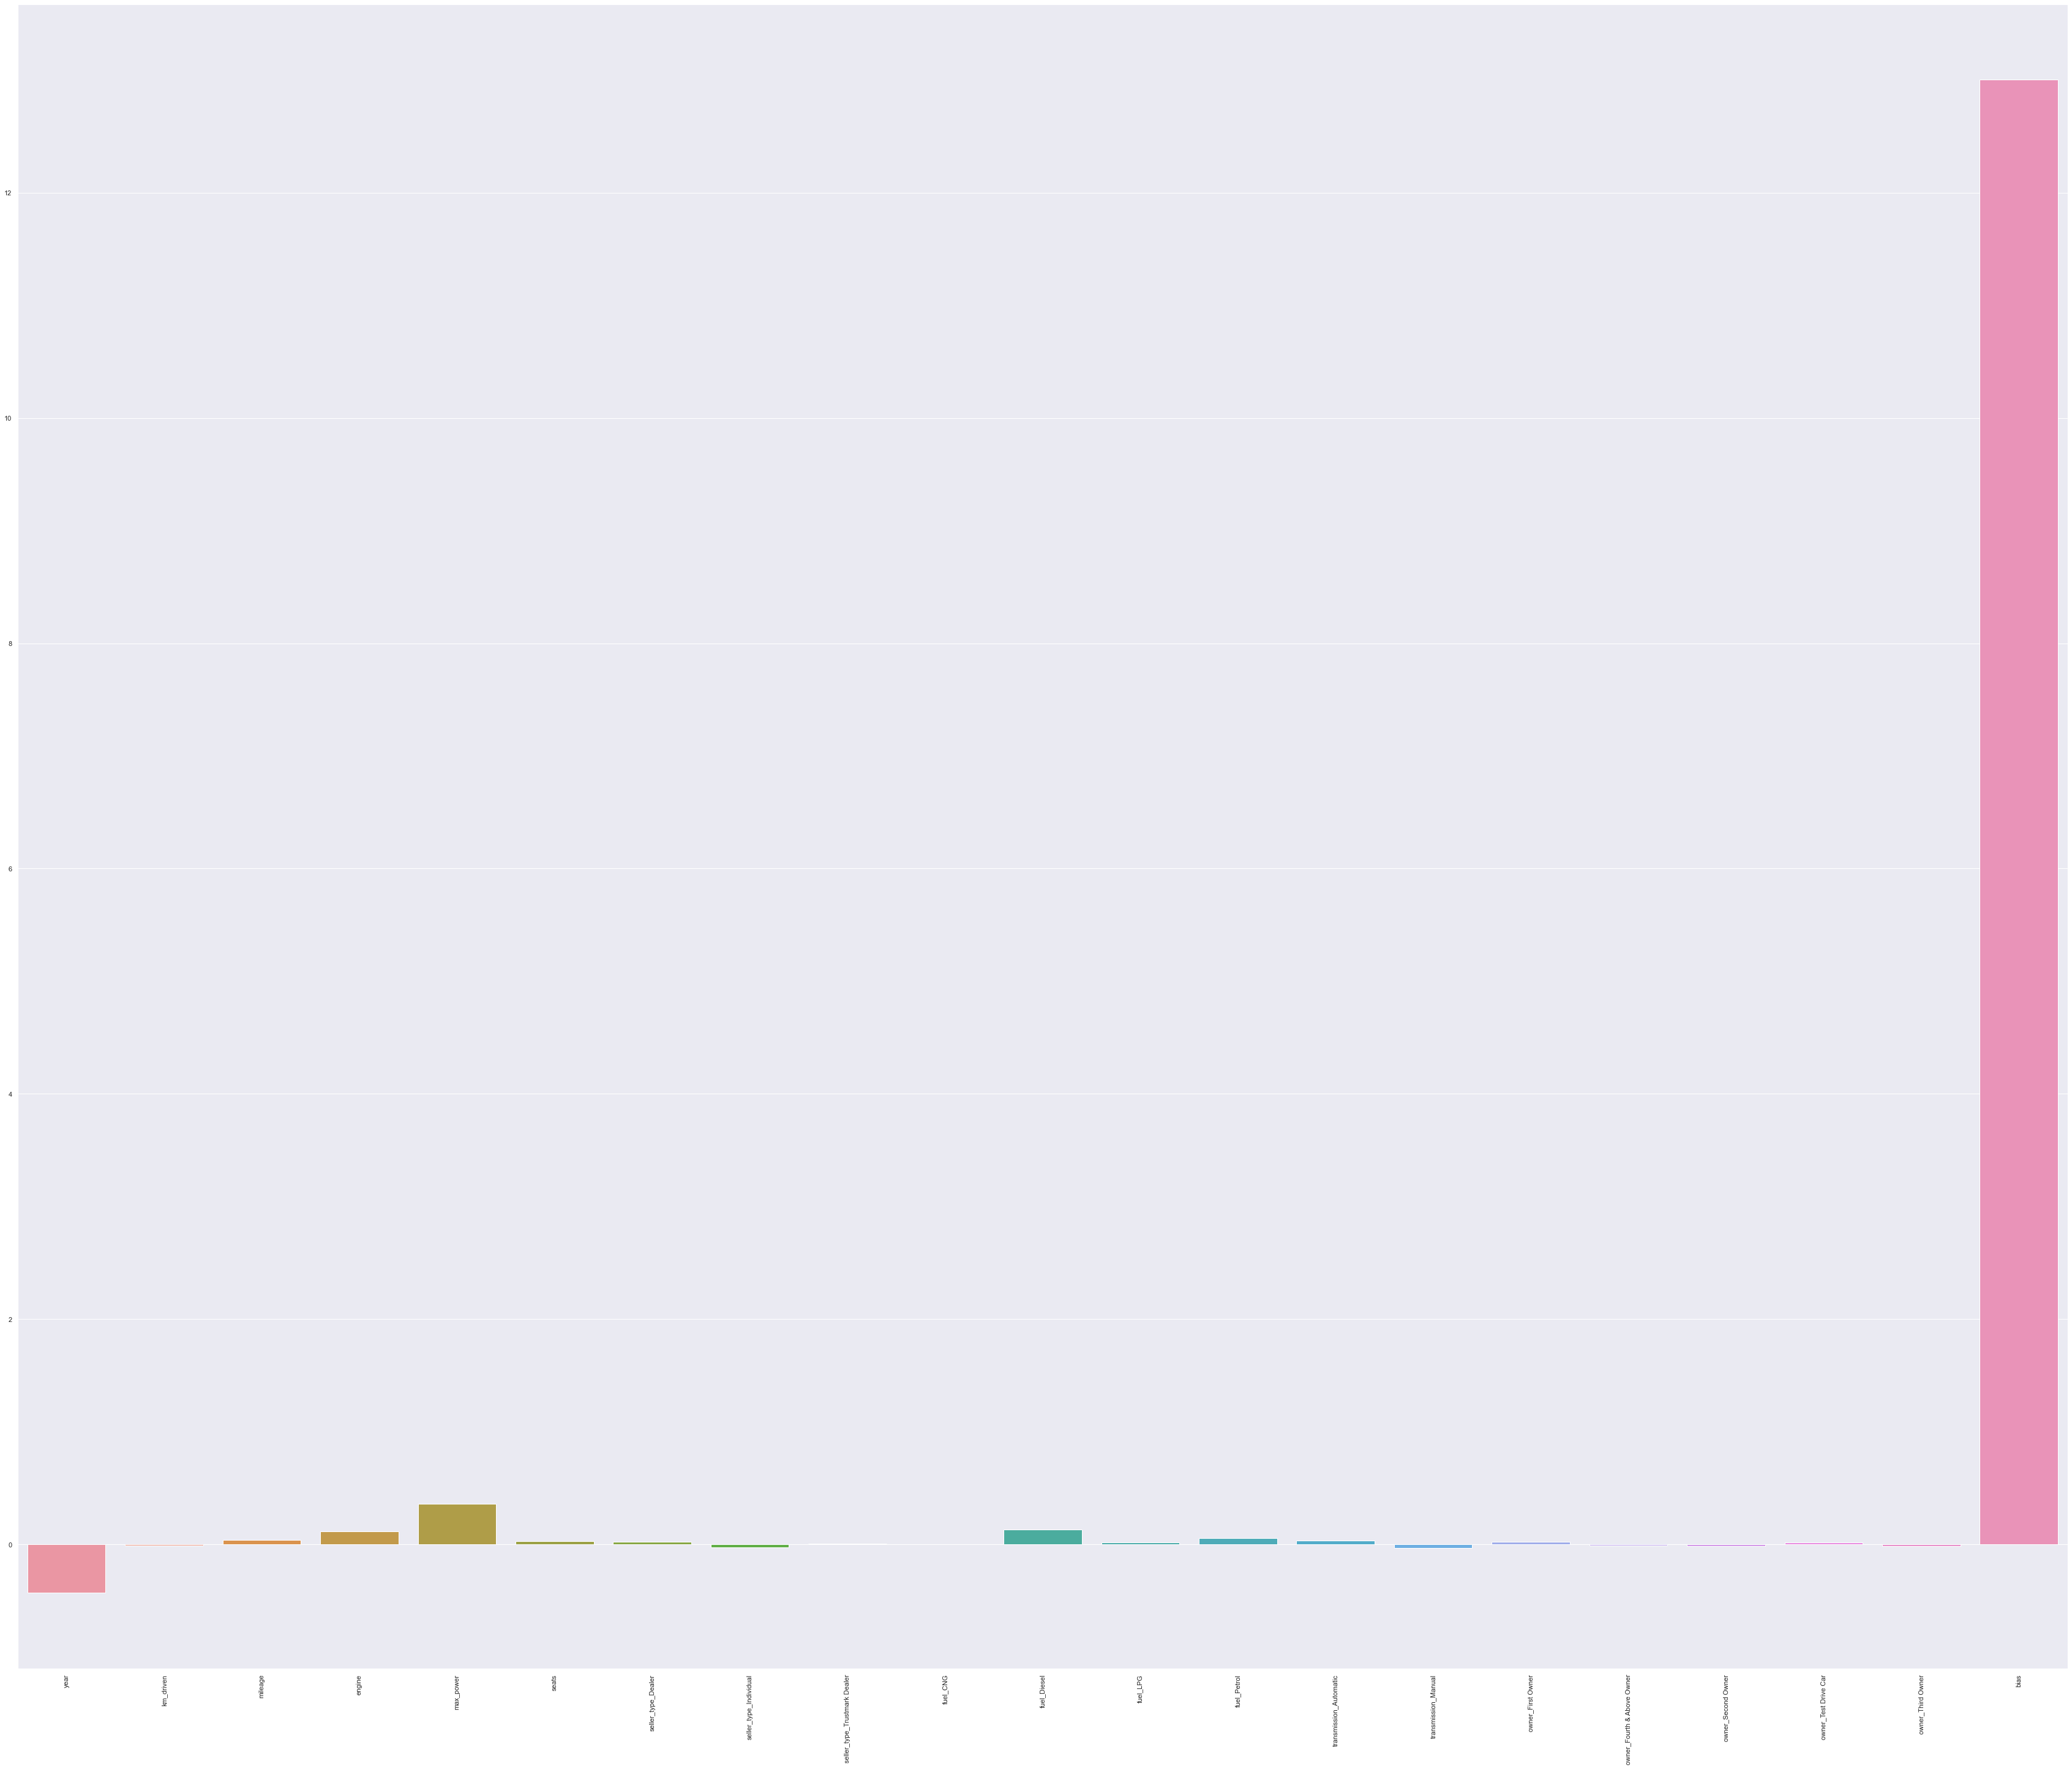

In [37]:
### Your code here

##cite : https://seaborn.pydata.org/examples/part_whole_bars.html

values = X_train.columns.values
fig,ax = plt.subplots(figsize=(60,50))
ax = sns.barplot(y=trained_model, x=values,)
plt.xticks(rotation=90)
plt.show()

**Ans** : From the plot above, as per mu understanding the best features are mileage, fuel_diesel, fuel_lpg and engine are the best parameters

**Tune Regularization Parameter $\alpha$**

**Now, let's do ridge regression and tune the $\alpha$ regularization parameter on the auto MPG dataset.**

**1.13. Sweep out values for $\alpha$ using `alphas = np.logspace(-2, 1, 10)`. Perform a grid search over these $\alpha$ values, recording the training and validation MSEs for each $\alpha$. A simple grid search is fine, no need for k-fold cross validation. Plot the training and validation MSEs as a function of $\alpha$ on a single figure. Make sure to label the axes and the training and validation MSE curves. Use a log scale for the x-axis.**

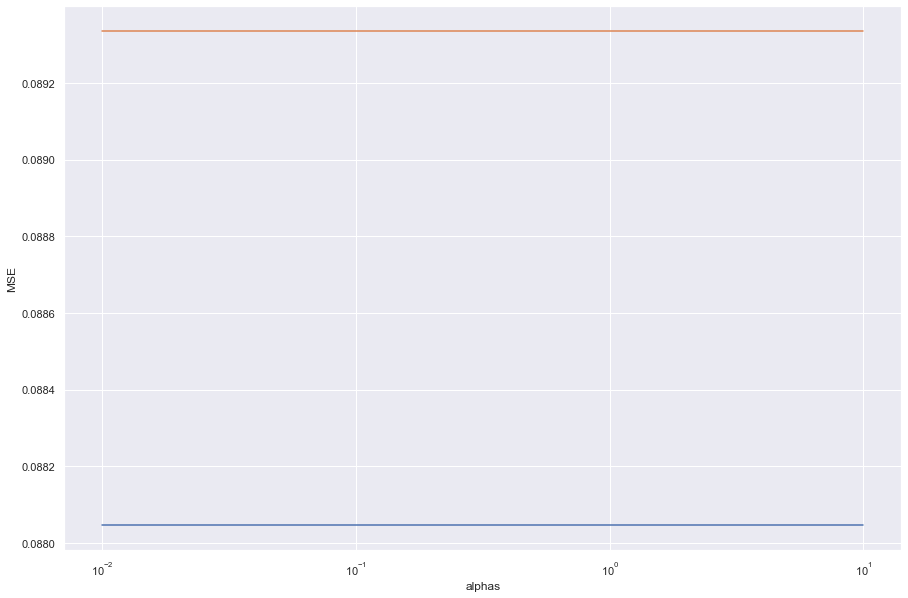

In [38]:
### Your code here

from sklearn.metrics import mean_squared_error
from sklearn.model_selection import GridSearchCV

###variables
alphas = np.logspace(-2, 1, 10) #as mentioned
mse_train=[]
mse_val=[]
for i in alphas:
    linreg_new = LinearRegression(i)
    model = linreg_new.train(X_train,y_train)
    y_train_pred = linreg.predict(X_train)
    y_val_pred = linreg.predict(X_val)
    mse_train.append(mean_squared_error(y_train,y_train_pred))
    mse_val.append(mean_squared_error(y_val,y_val_pred))
    
fig = plt.figure(figsize=(15,10))
plt.plot(alphas,mse_train,label="training MSE")
plt.plot(alphas,mse_val,label="validation MSE")
plt.xscale("log")
plt.xlabel("alphas")
plt.ylabel("MSE")
plt.show()     

**Explain your plot above. How do training and validation MSE behave with decreasing model complexity (increasing $\alpha$)?**

### Your answer here

Ideally, as the value of alpha increases the model complexity also increases, which results in the increase in the values of MSE for both training and testing. In this plot we are getting the best alpha, which is majorly because of the bias term

**1.14. Using the $\alpha$ which gave the best validation MSE above, train a model on the training set. Report the value of $\alpha$ and its training, validation, and test MSE. This is the final tuned model which you would deploy in production.**

In [39]:
### Your code here

mse_min = min(mse_val)
best_alpha = alphas[mse_val.index(mse_min)]

linreg_best = LinearRegression(best_alpha)
trained_model = linreg_best.train(X_train, y_train)
y_train_pred = linreg_best.predict(X_train)
y_test_pred = linreg_best.predict(X_test)
y_val_pred = linreg_best.predict(X_val)
mse_autompg_train_best= mean_squared_error(y_train,y_train_pred)
mse_autompg_val_best = mean_squared_error(y_val,y_val_pred)
mse_autompg_test_best = mean_squared_error(y_test,y_test_pred)

print("Best Alpha:", best_alpha)
print("Best MSE for train:", mse_autompg_train_best)
print("Best MSE for test:", mse_autompg_test_best)
print("Best MSE for val:", mse_autompg_val_best)

Best Alpha: 0.01
Best MSE for train: 0.08804615717952291
Best MSE for test: 0.0872615513804611
Best MSE for val: 0.0892802175661692


# **Part 2: Logistic Regression**

**Gender Recognition by Voice and Speech Analysis**

**This dataset is used to identify a voice as male or female, based upon acoustic properties of the voice and speech.**

In [40]:
voice_df = pd.read_csv("voice-classification.csv")
voice_df.head()

,meanfreq,sd,median,Q25,Q75,IQR,skew,kurt,sp.ent,sfm,...,centroid,meanfun,minfun,maxfun,meandom,mindom,maxdom,dfrange,modindx,label
0,0.059781,0.064241,0.032027,0.015071,0.090193,0.075122,12.863462,274.402906,0.893369,0.491918,...,0.059781,0.084279,0.015702,0.275862,0.007812,0.007812,0.007812,0.000000,0.000000,male
1,0.066009,0.067310,0.040229,0.019414,0.092666,0.073252,22.423285,634.613855,0.892193,0.513724,...,0.066009,0.107937,0.015826,0.250000,0.009014,0.007812,0.054688,0.046875,0.052632,male
2,0.077316,0.083829,0.036718,0.008701,0.131908,0.123207,30.757155,1024.927705,0.846389,0.478905,...,0.077316,0.098706,0.015656,0.271186,0.007990,0.007812,0.015625,0.007812,0.046512,male
3,0.151228,0.072111,0.158011,0.096582,0.207955,0.111374,1.232831,4.177296,0.963322,0.727232,...,0.151228,0.088965,0.017798,0.250000,0.201497,0.007812,0.562500,0.554688,0.247119,male
4,0.135120,0.079146,0.124656,0.078720,0.206045,0.127325,1.101174,4.333713,0.971955,0.783568,...,0.135120,0.106398,0.016931,0.266667,0.712812,0.007812,5.484375,5.476562,0.208274,male


**Data - Checking Rows & Columns**

In [41]:
#Number of Rows & Columns
print(voice_df.shape) 

(3168, 21)


**2.1 What is the probability of observing different  categories in the Label feature of the dataset?**

This is mainly to check class imbalance in the dataset, and to apply different techniques to balance the dataset, which we will learn later.

In [42]:
#code here

count = voice_df["label"].value_counts()
m =  count[0]
f = count[1]
prob_m = m/len(voice_df)
prob_f = 1-prob_m
print("Probability of Male voice :", prob_m)
print("Probability of Female voice :", prob_f)

Probability of Male voice : 0.5
Probability of Female voice : 0.5


In [43]:
voice_df.info()
print("Shape of dataset :",voice_df.shape)
feature_list = list(voice_df.columns)
print("Original dataframe feature list :",feature_list)
print("Length of Original dataframe feature list :",len(feature_list))

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3168 entries, 0 to 3167
Data columns (total 21 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   meanfreq  3168 non-null   float64
 1   sd        3168 non-null   float64
 2   median    3168 non-null   float64
 3   Q25       3168 non-null   float64
 4   Q75       3168 non-null   float64
 5   IQR       3168 non-null   float64
 6   skew      3168 non-null   float64
 7   kurt      3168 non-null   float64
 8   sp.ent    3168 non-null   float64
 9   sfm       3168 non-null   float64
 10  mode      3168 non-null   float64
 11  centroid  3168 non-null   float64
 12  meanfun   3168 non-null   float64
 13  minfun    3168 non-null   float64
 14  maxfun    3168 non-null   float64
 15  meandom   3168 non-null   float64
 16  mindom    3168 non-null   float64
 17  maxdom    3168 non-null   float64
 18  dfrange   3168 non-null   float64
 19  modindx   3168 non-null   float64
 20  label     3168 non-null   obje

**2.2 Plot the relationships between the label and the 20 numerical features using a small multiple of box plots. Make sure to label the axes. What useful information do this plot provide?**

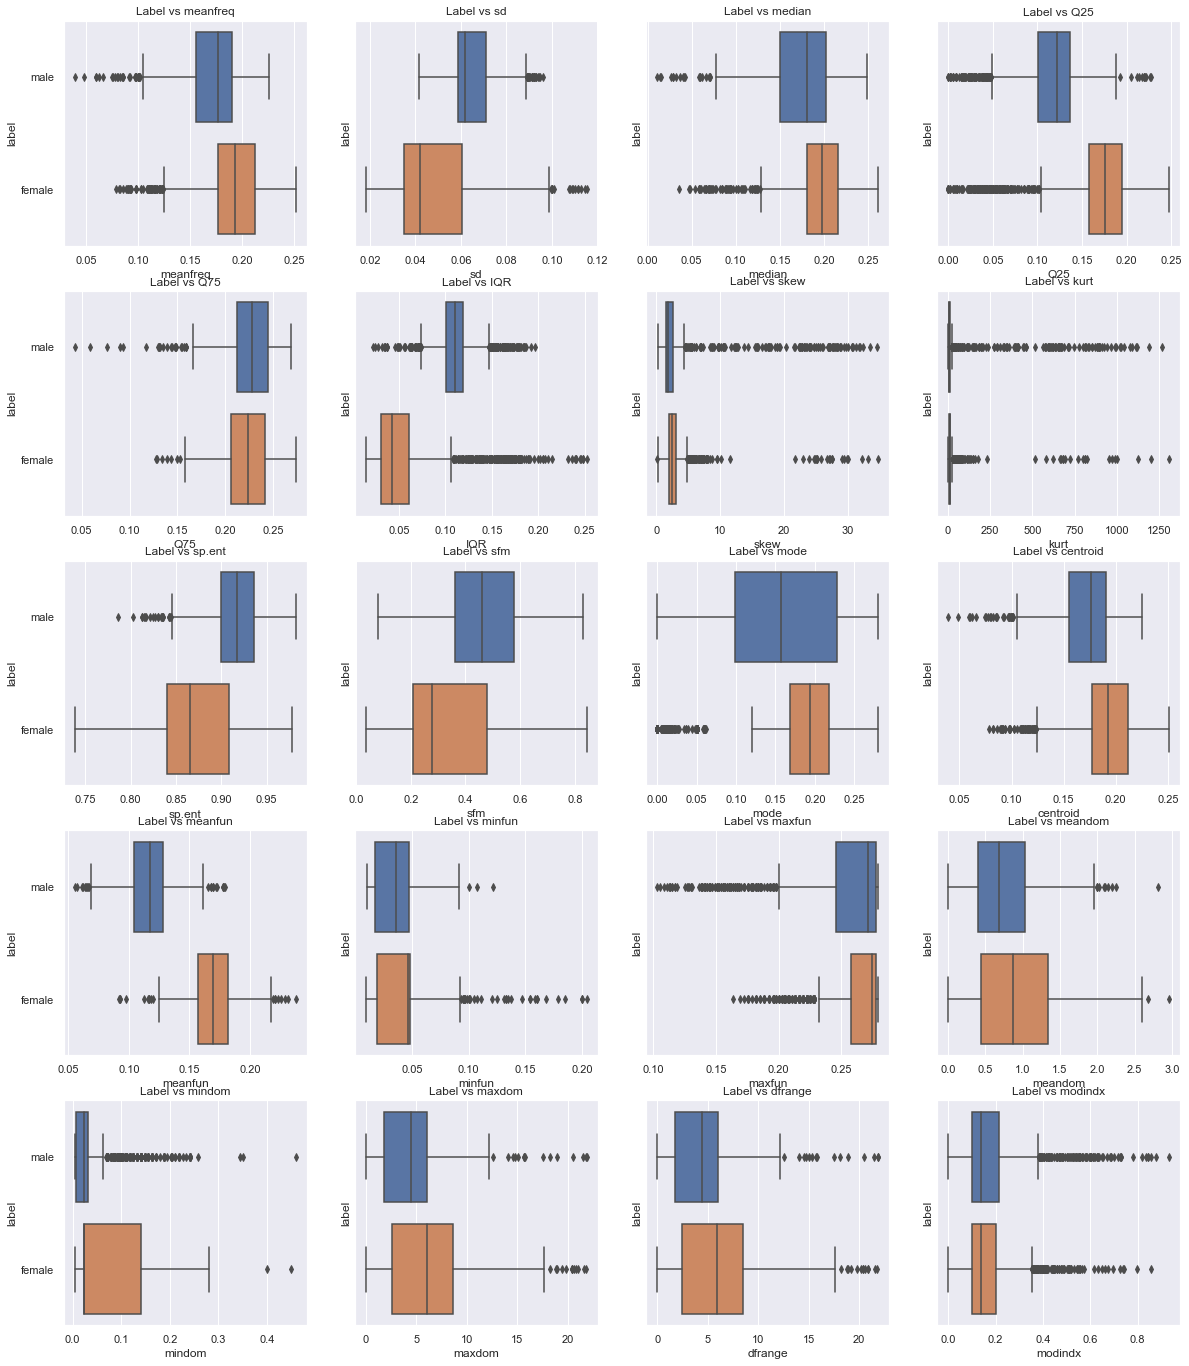

Text(0.5, 0.98, 'Relationship between the Label and 20 features')

In [44]:
#code here

fig,ax = plt.subplots(5,4, figsize=(20,24), sharey=True)
ax = ax.ravel()
feature_list = feature_list[:20]
# print(feature_list)
for i in range(0,len(feature_list)):
    sns.boxplot(x=voice_df[str(feature_list[i])],y=voice_df['label'],data=voice_df,ax=ax[i])
    ax[i].set_title("Label vs " + feature_list[i])
plt.show()
fig.suptitle('Relationship between the Label and 20 features')

**2.3 Plot the correlation matrix, and check if there is high correlation between the given numerical features (Threshold >=0.9). If yes, drop those highly correlated features from the dataframe. Why is necessary to drop those columns before proceeding further?**

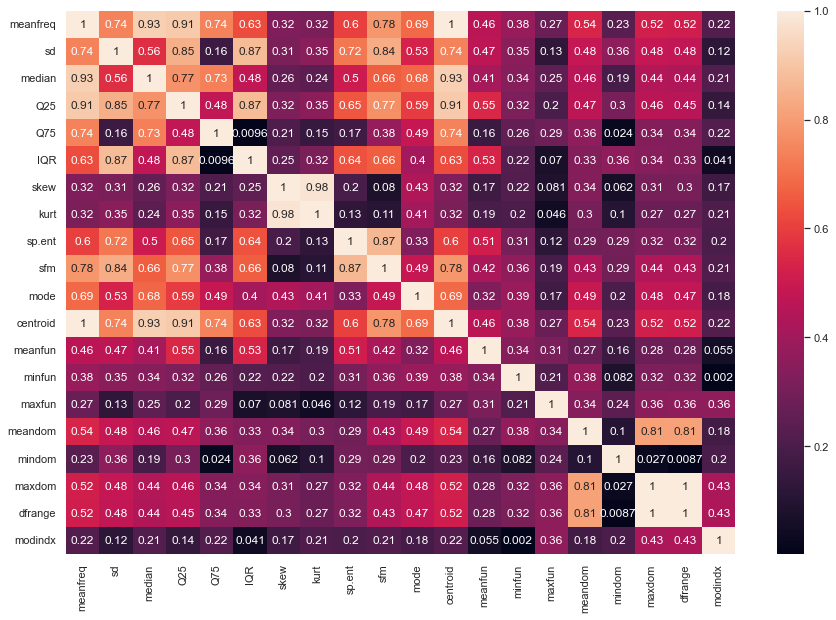

In [45]:
#code here

fig = plt.figure(figsize=(15,10))
vcorr = voice_df.corr().abs()  ##3get the absolute value for the correlation to figure out which blocks to drop
sns.heatmap(vcorr,annot=True)
plt.show()

we need to find the huighly correlated features, so we can remove features greater than 0.9

In [46]:
### cite : https://stackoverflow.com/questions/29294983/how-to-calculate-correlation-between-all-columns-and-remove-highly-correlated-on

###taken from the stackoverflow code on how to drop highly correlated feature columns
high = vcorr.where(np.triu(np.ones(vcorr.shape), k=1).astype(np.bool))
correlated_cols = [column for column in high.columns if any(high[column] > 0.90)]
voice_df.drop(correlated_cols, axis=1, inplace=True)

/var/folders/hk/fpn69pcx6jq8n7glwbj2pbp40000gn/T/ipykernel_53646/3949039069.py:4: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  high = vcorr.where(np.triu(np.ones(vcorr.shape), k=1).astype(np.bool))


In [47]:
print("New Dataframe with dropped features :",list(voice_df.columns))
print("Length of new dataframe :", len(list(voice_df.columns)))

New Dataframe with dropped features : ['meanfreq', 'sd', 'Q75', 'IQR', 'skew', 'sp.ent', 'sfm', 'mode', 'meanfun', 'minfun', 'maxfun', 'meandom', 'mindom', 'maxdom', 'modindx', 'label']
Length of new dataframe : 16


**Separating Features & Y variable from the processed dataset**

**Please note to replace the dataframe below with the new dataframe created after removing highly correlated features**

In [48]:
# Split data into features and labels
voice_X = voice_df.drop(columns=['label']) #replace "voice_df1" with your dataframe from 2.3 to make sure the code runs
voice_y = voice_df['label']
print(voice_X.columns)

Index(['meanfreq', 'sd', 'Q75', 'IQR', 'skew', 'sp.ent', 'sfm', 'mode',
       'meanfun', 'minfun', 'maxfun', 'meandom', 'mindom', 'maxdom',
       'modindx'],
      dtype='object')


**2.4 Apply the following pre-processing steps:**

1) Use OrdinalEncoding to encode the label in the dataset (male & female)

2) Convert the label from a Pandas series to a Numpy (m x 1) vector. If you don't do this, it may cause problems when implementing the logistic regression model.

3)Split the dataset into training (60%), validation (20%), and test (20%) sets.

4) Standardize the columns in the feature matrices. To avoid information leakage, learn the standardization parameters from training, and then apply training, validation and test dataset.

5) Add a column of ones to the feature matrices of train, validation and test dataset. This is a common trick so that we can learn a coefficient for the bias term of a linear model.

In [49]:
#code here

###ordinal encoding
from sklearn.preprocessing import OrdinalEncoder   #for ordinal encoder
encoded_label = OrdinalEncoder(categories=[["male","female"]])
voice_y = voice_y.to_numpy().reshape(-1,1)
voice_y = encoded_label.fit_transform(voice_y)

###split dataset
X_dev_v, X_test_v, y_dev_v, y_test_v = train_test_split(voice_X, voice_y, test_size=0.2, shuffle=True)
X_train_v, X_val_v, y_train_v, y_val_v = train_test_split(X_dev_v, y_dev_v, test_size=0.25, shuffle=True)
print("X_train shape:", X_train_v.shape)
print("X_test shape:", X_test_v.shape)
print("X_val shape:", X_val_v.shape)

###standardize the dataset 
###cite : https://stackoverflow.com/questions/24645153/pandas-dataframe-columns-scaling-with-sklearn
t1 = X_train_v.columns
t2 = X_test_v.columns
t3 = X_val_v.columns
X_train_v[t1] = StandardScaler().fit_transform(X_train_v[t1])
X_test_v[t2] = StandardScaler().fit_transform(X_test_v[t2])
X_val_v[t3] = StandardScaler().fit_transform(X_val_v[t3])
print("testing standardizing on X_train:", X_train_v)

X_train shape: (1900, 15)
X_test shape: (634, 15)
X_val shape: (634, 15)
testing standardizing on X_train:       meanfreq        sd       Q75       IQR      skew    sp.ent       sfm  \
3132  0.836128  0.804657  0.964681 -1.007041 -0.126264 -0.087174 -0.104853   
2330  1.996612 -1.156338  1.484976 -1.262978  0.009418 -1.859015 -1.220216   
3112 -0.611819 -0.188532 -1.624996 -1.335407  1.188558 -0.519343  0.099286   
3124  0.860349  0.805836  0.984480 -1.028203 -0.091191  0.062932 -0.027079   
672  -0.980134  0.390706 -0.970091  0.519538  0.004749 -0.036691  0.098057   
...        ...       ...       ...       ...       ...       ...       ...   
2456  0.805860 -1.060967 -0.044788 -1.245371 -0.060955 -1.257500 -0.980807   
2953 -0.077266  0.490488  0.080224 -0.050932 -0.220245  1.002648  0.849713   
757  -0.599223  0.193333 -0.588211  0.313239 -0.509723  1.149471  0.828577   
822   0.152583  0.226081  0.435453  0.312154 -0.569830  0.973883  0.561589   
860  -0.457456  0.566931  0.008989 

**2.5 Implement Logistic Regression**

We will now implement logistic regression with L2 regularization. Given an (m x n) feature matrix $X$, an (m x 1) label vector $y$, and an (n x 1) weight vector $w$, the hypothesis function for logistic regression is:

$$
y = \sigma(X w)
$$

where $\sigma(x) = \frac{1}{1 + e^{-x}}$, i.e. the sigmoid function. This function scales the prediction to be a probability between 0 and 1, and can then be thresholded to get a discrete class prediction.

Just as with linear regression, our objective in logistic regression is to learn the weights $𝑤$ which best fit the data. For L2-regularized logistic regression, we find an optimal $w$ to minimize the following loss function:

$$
\min_{w} \ -y^T \ \text{log}(\sigma(Xw)) \ - \  (\mathbf{1} - y)^T \ \text{log}(\mathbf{1} - \sigma(Xw)) \ + \ \alpha \| w \|^2_2 \\
$$

Unlike linear regression, however, logistic regression has no closed-form solution for the optimal $w$. So, we will use gradient descent to find the optimal $w$. The (n x 1) gradient vector $g$ for the loss function above is:

$$
g = X^T \Big(\sigma(Xw) - y\Big) + 2 \alpha w
$$

Below is pseudocode for gradient descent to find the optimal $w$. You should first initialize $w$ (e.g. to a (n x 1) zero vector). Then, for some number of epochs $t$, you should update $w$ with $w - \eta g $, where $\eta$ is the learning rate and $g$ is the gradient. You can learn more about gradient descent [here](https://www.coursera.org/lecture/machine-learning/gradient-descent-8SpIM).

> $w = \mathbf{0}$
> 
> $\text{for } i = 1, 2, ..., t$
>
> $\quad \quad w = w - \eta g $


Implement a LogisticRegression class with five methods: train, predict, calculate_loss, calculate_gradient, and calculate_sigmoid. **You may NOT use sklearn for this implementation. It is highly recommended that you vectorize your code.**

In [50]:
class LogisticRegression():
    '''
    Logistic regression model with L2 regularization.

    Attributes
    ----------
    alpha: regularization parameter
    t: number of epochs to run gradient descent
    eta: learning rate for gradient descent
    w: (n x 1) weight vector
    '''
    
    def __init__(self, alpha, t, eta):
        self.alpha = alpha
        self.t = t
        self.eta = eta
        self.w = None

    def train(self, X, y):
        '''Trains logistic regression model using gradient descent 
        (sets w to its optimal value).
        
        Parameters
        ----------
        X : (m x n) feature matrix
        y: (m x 1) label vector
        
        Returns
        -------
        losses: (t x 1) vector of losses at each epoch of gradient descent
        '''
        ### Your code here
        
        n = X.shape[1]
        final_loss = []
        self.w = np.random.rand(n,1)
#         print(self.w.shape)
        for i in range(self.t):
            self.w = self.w - (self.eta * self.calculate_gradient(X,y))
            final_loss.append(self.calculate_loss(X,y))
        losses = final_loss

        return losses
        
        
        
    def predict(self, X):
        '''Predicts on X using trained model. Make sure to threshold 
        the predicted probability to return a 0 or 1 prediction.
        
        Parameters
        ----------
        X : (m x n) feature matrix
        
        Returns
        -------
        y_pred: (m x 1) 0/1 prediction vector
        '''
        ### Your code here

        a = self.calculate_sigmoid(np.dot(X,self.w))
        a[a > 0.5] = 1
        a[a < 0.5] = 0
        return a
    
    def calculate_loss(self, X, y):
        '''Calculates the logistic regression loss using X, y, w, 
        and alpha. Useful as a helper function for train().
        
        Parameters
        ----------
        X : (m x n) feature matrix
        y: (m x 1) label vector
        
        Returns
        -------
        loss: (scalar) logistic regression loss
        '''
        ### Your code here
        
        m = X.shape[0] ###divide with the total 
        a = self.calculate_sigmoid(np.dot(X,self.w))
        
        ###for getting loss across the entire length of data, it is normalized when divided by m
        ##hence removing it for the instructions of getting a convergence curve
#       loss = (- 1 / m) * np.sum(y * np.log(a) + (1 - y) * (np.log(1 - a))) + 0.5 * (1 / m) *  self.alpha * np.sum(self.w * self.w)
        
        loss = (- 1 ) * np.sum(y * np.log(a) + (1 - y) * (np.log(1 - a))) + 0.5 * (1) *  self.alpha * np.sum(self.w * self.w)
        return loss
    
    def calculate_gradient(self, X, y):
        '''Calculates the gradient of the logistic regression loss 
        using X, y, w, and alpha. Useful as a helper function 
        for train().
        
        Parameters
        ----------
        X : (m x n) feature matrix
        y: (m x 1) label vector
        
        Returns
        -------
        gradient: (n x 1) gradient vector for logistic regression loss
        '''
        ### Your code here
        m = X.shape[0]
        a = self.calculate_sigmoid(np.dot(X,self.w)) ##activation
        
        ###for getting gradient the entire length of dats, it is normalized when divided by m
        ##hence removing it for instructions of getting a convergence curve
#       J = (1 / m) * np.dot(X.T, (a - y)) + 2 * self.alpha * self.w

        J = (1) * np.dot(X.T, (a - y)) + 2 * self.alpha * self.w
        return J
        
    
    def calculate_sigmoid(self, x):
        '''Calculates the sigmoid function on each element in vector x. 
        Useful as a helper function for predict(), calculate_loss(), 
        and calculate_gradient().
        
        Parameters
        ----------
        x: (m x 1) vector
        
        Returns
        -------
        sigmoid_x: (m x 1) vector of sigmoid on each element in x
        '''
        ### Your code here
        
        h = np.zeros_like(x)
        h = (1/(1+np.exp(-x)))
        return h

**2.6 Plot Loss over Epoch and Search the space randomly to find best hyperparameters.**

A: Using your implementation above, train a logistic regression model **(alpha=0, t=100, eta=1e-3)** on the voice recognition training data. Plot the training loss over epochs. Make sure to label your axes. You should see the loss decreasing and start to converge. 

B: Using **alpha between (0,1), eta between(0, 0.001) and t between (0, 100)**, find the best hyperparameters for LogisticRegression. You can randomly search the space 20 times to find the best hyperparameters.

C. Compare accuracy on the test dataset for both the scenarios.

In [51]:
#code here

logr = LogisticRegression(alpha=0,t=100,eta=1e-3)
loss = logr.train(X_train_v, y_train_v)
y_pred = logr.predict(X_test_v)

### a). Plotting logistic regression loss

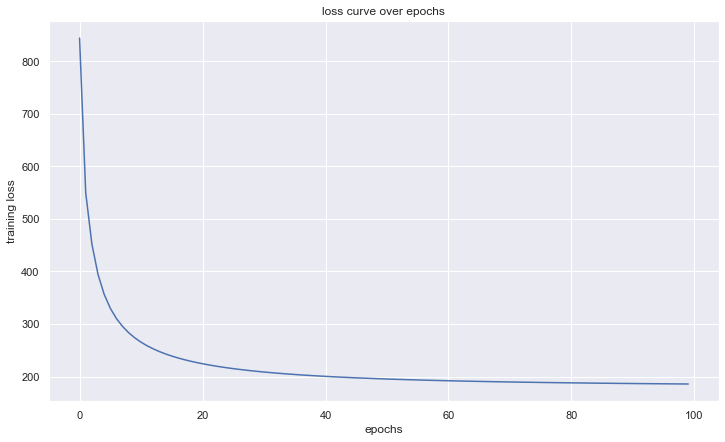

In [52]:
t = range(0,100)
fig = plt.figure(figsize=(12,7))
ax = sns.lineplot()
ax = sns.lineplot(x=t,y=loss)
ax.set_xlabel("epochs")
ax.set_ylabel("training loss")
plt.title("loss curve over epochs")
plt.show()

### b). find the best hyperparameters for LogisticRegression

In [53]:
best_loss=[]
best_parameters=[]
alpha = np.random.uniform(0, 1)
eta = np.random.uniform(0, 0.001)
t = np.random.randint(0,100)

##search random space
for i in range(20):
    random_lr = LogisticRegression(alpha,t,eta)
    random_loss = random_lr.train(X_train_v,y_train_v)
    best_loss.append(random_loss)
    best_parameters.append([alpha,eta,t])
    
best_loss_np = np.array(best_loss)
best_loss_idx = np.where(best_loss_np == best_loss_np.min())
best_t = best_parameters[best_loss_idx[0][0]][2]
best_eta = best_parameters[best_loss_idx[0][0]][1]
best_alpha_lr = best_parameters[best_loss_idx[0][0]][0]

print("Best Alpha:", best_alpha_lr)
print("Best ETA:", best_eta)
print("Best t:", best_t )
print("Best loss:", best_loss_np.min())

Best Alpha: 0.18788229286158842
Best ETA: 0.0009225015499363742
Best t: 97
Best loss: 188.2490945235452


**2.7 Feature Importance**

Interpret your trained model using a bar chart of the model weights. Make sure to label the bars (x-axis) and don't forget the bias term! 

In [54]:
#code here

print("Best accuracy for original:", accuracy_score(y_test_v,y_pred))

best_logr = LogisticRegression(best_alpha_lr,best_t,best_eta)
best_loss_new = best_logr.train(X_train_v,y_train_v)
y_pred_best = best_logr.predict(X_test_v)
print("Best accuracy for best parameteres chosen model:", accuracy_score(y_test_v,y_pred_best))

Best accuracy for original: 0.9684542586750788
Best accuracy for best parameteres chosen model: 0.9700315457413249



# **Part 3: Support Vector Machines - with the same Dataset**

**3.1 Dual SVM**

A) Train a dual SVM (with default parameters) for both kernel=“linear” and kernel=“rbf”) on the Voice Recognition training data.

B) Make predictions and report the accuracy on the training, validation, and test sets. Which kernel gave better accuracy on test dataset and why do you think that was better?

C) Please report the support vectors in both the cases and what do you observe? Explain


In [55]:
#code here 

##a&b completed

## cite : https://scikit-learn.org/stable/modules/generated/sklearn.svm.LinearSVC.html 

from sklearn.svm import SVC
from sklearn.svm import LinearSVC

###model linear
print("Linear Model Statistics")
model_linear = SVC(kernel = 'linear')
model_linear = model_linear.fit(X_train_v,y_train_v)
print("Model Score:", model_linear.score(X_train_v,y_train_v))
predicted_train=model_linear.predict(X_train_v)
predicted_test=model_linear.predict(X_test_v)
predicted_val=model_linear.predict(X_val_v)
acc_train = accuracy_score(y_train_v,predicted_train)
acc_test = accuracy_score(y_test_v,predicted_test)
acc_val = accuracy_score(y_val_v,predicted_val)
print("Training Accuracy for the Linear Model :", acc_train)
print("Testing Accuracy for the Linear Model :", acc_test)
print("Validation Accuracy for the Linear Model :", acc_val)
svc_linear = model_linear.support_vectors_

print("-"*70)

###model linear
print("rbf Model Statistics")
model_rbf = SVC(kernel = 'rbf')
model_rbf = model_rbf.fit(X_train_v,y_train_v)
print("Model Score:", model_rbf.score(X_train_v,y_train_v))
predicted_train=model_rbf.predict(X_train_v)
predicted_test=model_rbf.predict(X_test_v)
predicted_val=model_rbf.predict(X_val_v)
acc_train_rbf = accuracy_score(y_train_v,predicted_train)
acc_test_rbf = accuracy_score(y_test_v,predicted_test)
acc_val_rbf = accuracy_score(y_val_v,predicted_val)
print("Training Accuracy for the rbf Model :", acc_train_rbf)
print("Testing Accuracy for the rbf Model :", acc_test_rbf)
print("Validation Accuracy for the rbd Model :", acc_val_rbf)
svc_rbf = model_rbf.support_vectors_

Linear Model Statistics
Model Score: 0.9757894736842105
Training Accuracy for the Linear Model : 0.9757894736842105
Testing Accuracy for the Linear Model : 0.9700315457413249
Validation Accuracy for the Linear Model : 0.9716088328075709
----------------------------------------------------------------------
rbf Model Statistics
Model Score: 0.9857894736842105
Training Accuracy for the rbf Model : 0.9857894736842105
Testing Accuracy for the rbf Model : 0.9794952681388013
Validation Accuracy for the rbd Model : 0.9779179810725552


/Users/riyagupta/miniforge3/lib/python3.9/site-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/riyagupta/miniforge3/lib/python3.9/site-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


#### c (a&b in previous cell)

In [56]:
print('SV for linear', svc_linear)

SV for linear [[ 0.58940648  0.30608669  1.21351579 ... -0.45734573  0.15922857
  -0.58105923]
 [-0.36056142 -0.0714999  -1.24245016 ... -0.45734573 -0.46572715
  -0.97516129]
 [-0.15603958 -0.0803053   0.2612229  ... -0.45734573  0.94374745
   0.02183373]
 ...
 [-0.13927619  0.6543865   0.90295329 ... -0.7552231  -0.34716286
   1.08747241]
 [-2.79286228  1.58506487 -1.66149406 ... -0.70818984 -0.53664411
  -0.10959062]
 [-0.76030628  1.06982688  0.17718536 ... -0.45734573  1.46897619
  -0.65972091]]


In [57]:
print('SV for RBF', svc_rbf)

SV for RBF [[-1.74302844  2.2811534  -0.86851213 ... -0.70818984 -1.44748383
  -1.45447908]
 [ 0.45196715  0.04556403  0.75065114 ...  2.8036276  -1.22365217
   1.64180696]
 [-1.44132488  1.75513359 -0.12016132 ... -0.70818984 -1.3255953
  -1.09796172]
 ...
 [-0.05897348  0.88140487  0.23723919 ... -0.45734573  1.46897619
  -0.66698159]
 [-0.76030628  1.06982688  0.17718536 ... -0.45734573  1.46897619
  -0.65972091]
 [ 0.11941798 -0.62203709 -0.24295204 ... -0.45734573 -0.93776817
   0.10881526]]


**Ans :** As we can see from the above calculations and model training, SVM for RBF kernel performs better than the Linear SVM. One of the possible reasons which might cause this behaviour is because of the fact that data might not not linearly separable. Usually, Linear SVM is used when the data is linearly separable. in this case, we could have also used polynomial svm as well. To test we can also try various values of gamma and cost.

**3.2 Using Kernel “rbf”, tune the hyperparameter “C” using the Grid Search & k-fold cross validation. You may take k=5 and assume values in grid between 1 to 100 with interval range of your choice.**

In [58]:
#code here

###cite : geeks for geeks : https://www.geeksforgeeks.org/svm-hyperparameter-tuning-using-gridsearchcv-ml/

# print(np.linspace(1, 100, num=50))
from sklearn.model_selection import GridSearchCV
param_grid = {'C': np.linspace(1, 100, num=20),
              'kernel': ['rbf']}
grid = GridSearchCV(SVC(), param_grid, cv=5, refit = True, verbose = 3)
grid.fit(X_dev_v,y_dev_v)

Fitting 5 folds for each of 20 candidates, totalling 100 fits
[CV 1/5] END .................C=1.0, kernel=rbf;, score=0.755 total time=   0.1s
[CV 2/5] END .................C=1.0, kernel=rbf;, score=0.696 total time=   0.1s


/Users/riyagupta/miniforge3/lib/python3.9/site-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/riyagupta/miniforge3/lib/python3.9/site-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/riyagupta/miniforge3/lib/python3.9/site-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 3/5] END .................C=1.0, kernel=rbf;, score=0.704 total time=   0.1s
[CV 4/5] END .................C=1.0, kernel=rbf;, score=0.742 total time=   0.1s
[CV 5/5] END .................C=1.0, kernel=rbf;, score=0.713 total time=   0.1s


/Users/riyagupta/miniforge3/lib/python3.9/site-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/riyagupta/miniforge3/lib/python3.9/site-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/riyagupta/miniforge3/lib/python3.9/site-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 1/5] END ..C=6.2105263157894735, kernel=rbf;, score=0.828 total time=   0.1s
[CV 2/5] END ..C=6.2105263157894735, kernel=rbf;, score=0.828 total time=   0.1s
[CV 3/5] END ..C=6.2105263157894735, kernel=rbf;, score=0.819 total time=   0.1s


/Users/riyagupta/miniforge3/lib/python3.9/site-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/riyagupta/miniforge3/lib/python3.9/site-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/riyagupta/miniforge3/lib/python3.9/site-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 4/5] END ..C=6.2105263157894735, kernel=rbf;, score=0.826 total time=   0.1s
[CV 5/5] END ..C=6.2105263157894735, kernel=rbf;, score=0.808 total time=   0.1s
[CV 1/5] END ..C=11.421052631578947, kernel=rbf;, score=0.886 total time=   0.1s


/Users/riyagupta/miniforge3/lib/python3.9/site-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/riyagupta/miniforge3/lib/python3.9/site-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/riyagupta/miniforge3/lib/python3.9/site-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 2/5] END ..C=11.421052631578947, kernel=rbf;, score=0.858 total time=   0.1s
[CV 3/5] END ..C=11.421052631578947, kernel=rbf;, score=0.866 total time=   0.1s
[CV 4/5] END ..C=11.421052631578947, kernel=rbf;, score=0.862 total time=   0.1s


/Users/riyagupta/miniforge3/lib/python3.9/site-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/riyagupta/miniforge3/lib/python3.9/site-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/riyagupta/miniforge3/lib/python3.9/site-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 5/5] END ..C=11.421052631578947, kernel=rbf;, score=0.852 total time=   0.1s
[CV 1/5] END ...C=16.63157894736842, kernel=rbf;, score=0.907 total time=   0.1s
[CV 2/5] END ...C=16.63157894736842, kernel=rbf;, score=0.882 total time=   0.1s


/Users/riyagupta/miniforge3/lib/python3.9/site-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/riyagupta/miniforge3/lib/python3.9/site-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/riyagupta/miniforge3/lib/python3.9/site-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 3/5] END ...C=16.63157894736842, kernel=rbf;, score=0.878 total time=   0.1s
[CV 4/5] END ...C=16.63157894736842, kernel=rbf;, score=0.880 total time=   0.1s
[CV 5/5] END ...C=16.63157894736842, kernel=rbf;, score=0.875 total time=   0.1s


/Users/riyagupta/miniforge3/lib/python3.9/site-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/riyagupta/miniforge3/lib/python3.9/site-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/riyagupta/miniforge3/lib/python3.9/site-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 1/5] END ..C=21.842105263157894, kernel=rbf;, score=0.921 total time=   0.1s
[CV 2/5] END ..C=21.842105263157894, kernel=rbf;, score=0.893 total time=   0.1s
[CV 3/5] END ..C=21.842105263157894, kernel=rbf;, score=0.897 total time=   0.1s


/Users/riyagupta/miniforge3/lib/python3.9/site-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/riyagupta/miniforge3/lib/python3.9/site-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/riyagupta/miniforge3/lib/python3.9/site-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 4/5] END ..C=21.842105263157894, kernel=rbf;, score=0.890 total time=   0.1s
[CV 5/5] END ..C=21.842105263157894, kernel=rbf;, score=0.899 total time=   0.1s
[CV 1/5] END ..C=27.052631578947366, kernel=rbf;, score=0.939 total time=   0.1s


/Users/riyagupta/miniforge3/lib/python3.9/site-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/riyagupta/miniforge3/lib/python3.9/site-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/riyagupta/miniforge3/lib/python3.9/site-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 2/5] END ..C=27.052631578947366, kernel=rbf;, score=0.911 total time=   0.1s
[CV 3/5] END ..C=27.052631578947366, kernel=rbf;, score=0.907 total time=   0.1s
[CV 4/5] END ..C=27.052631578947366, kernel=rbf;, score=0.905 total time=   0.1s


/Users/riyagupta/miniforge3/lib/python3.9/site-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/riyagupta/miniforge3/lib/python3.9/site-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/riyagupta/miniforge3/lib/python3.9/site-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 5/5] END ..C=27.052631578947366, kernel=rbf;, score=0.917 total time=   0.1s
[CV 1/5] END ...C=32.26315789473684, kernel=rbf;, score=0.943 total time=   0.1s
[CV 2/5] END ...C=32.26315789473684, kernel=rbf;, score=0.917 total time=   0.1s


/Users/riyagupta/miniforge3/lib/python3.9/site-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/riyagupta/miniforge3/lib/python3.9/site-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/riyagupta/miniforge3/lib/python3.9/site-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 3/5] END ...C=32.26315789473684, kernel=rbf;, score=0.915 total time=   0.1s
[CV 4/5] END ...C=32.26315789473684, kernel=rbf;, score=0.913 total time=   0.1s
[CV 5/5] END ...C=32.26315789473684, kernel=rbf;, score=0.919 total time=   0.1s


/Users/riyagupta/miniforge3/lib/python3.9/site-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/riyagupta/miniforge3/lib/python3.9/site-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/riyagupta/miniforge3/lib/python3.9/site-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 1/5] END ..C=37.473684210526315, kernel=rbf;, score=0.949 total time=   0.1s
[CV 2/5] END ..C=37.473684210526315, kernel=rbf;, score=0.925 total time=   0.1s
[CV 3/5] END ..C=37.473684210526315, kernel=rbf;, score=0.921 total time=   0.1s


/Users/riyagupta/miniforge3/lib/python3.9/site-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/riyagupta/miniforge3/lib/python3.9/site-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/riyagupta/miniforge3/lib/python3.9/site-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 4/5] END ..C=37.473684210526315, kernel=rbf;, score=0.929 total time=   0.1s
[CV 5/5] END ..C=37.473684210526315, kernel=rbf;, score=0.927 total time=   0.1s
[CV 1/5] END ...C=42.68421052631579, kernel=rbf;, score=0.953 total time=   0.1s


/Users/riyagupta/miniforge3/lib/python3.9/site-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/riyagupta/miniforge3/lib/python3.9/site-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/riyagupta/miniforge3/lib/python3.9/site-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 2/5] END ...C=42.68421052631579, kernel=rbf;, score=0.927 total time=   0.1s
[CV 3/5] END ...C=42.68421052631579, kernel=rbf;, score=0.927 total time=   0.1s
[CV 4/5] END ...C=42.68421052631579, kernel=rbf;, score=0.929 total time=   0.1s


/Users/riyagupta/miniforge3/lib/python3.9/site-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/riyagupta/miniforge3/lib/python3.9/site-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/riyagupta/miniforge3/lib/python3.9/site-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 5/5] END ...C=42.68421052631579, kernel=rbf;, score=0.939 total time=   0.1s
[CV 1/5] END ...C=47.89473684210526, kernel=rbf;, score=0.957 total time=   0.1s
[CV 2/5] END ...C=47.89473684210526, kernel=rbf;, score=0.933 total time=   0.1s


/Users/riyagupta/miniforge3/lib/python3.9/site-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/riyagupta/miniforge3/lib/python3.9/site-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/riyagupta/miniforge3/lib/python3.9/site-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 3/5] END ...C=47.89473684210526, kernel=rbf;, score=0.931 total time=   0.1s
[CV 4/5] END ...C=47.89473684210526, kernel=rbf;, score=0.933 total time=   0.1s
[CV 5/5] END ...C=47.89473684210526, kernel=rbf;, score=0.947 total time=   0.1s


/Users/riyagupta/miniforge3/lib/python3.9/site-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/riyagupta/miniforge3/lib/python3.9/site-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/riyagupta/miniforge3/lib/python3.9/site-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 1/5] END ...C=53.10526315789473, kernel=rbf;, score=0.961 total time=   0.1s
[CV 2/5] END ...C=53.10526315789473, kernel=rbf;, score=0.937 total time=   0.1s
[CV 3/5] END ...C=53.10526315789473, kernel=rbf;, score=0.931 total time=   0.1s


/Users/riyagupta/miniforge3/lib/python3.9/site-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/riyagupta/miniforge3/lib/python3.9/site-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/riyagupta/miniforge3/lib/python3.9/site-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 4/5] END ...C=53.10526315789473, kernel=rbf;, score=0.937 total time=   0.1s
[CV 5/5] END ...C=53.10526315789473, kernel=rbf;, score=0.953 total time=   0.1s
[CV 1/5] END ..C=58.315789473684205, kernel=rbf;, score=0.963 total time=   0.1s


/Users/riyagupta/miniforge3/lib/python3.9/site-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/riyagupta/miniforge3/lib/python3.9/site-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/riyagupta/miniforge3/lib/python3.9/site-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 2/5] END ..C=58.315789473684205, kernel=rbf;, score=0.937 total time=   0.1s
[CV 3/5] END ..C=58.315789473684205, kernel=rbf;, score=0.937 total time=   0.1s
[CV 4/5] END ..C=58.315789473684205, kernel=rbf;, score=0.939 total time=   0.1s


/Users/riyagupta/miniforge3/lib/python3.9/site-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/riyagupta/miniforge3/lib/python3.9/site-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/riyagupta/miniforge3/lib/python3.9/site-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 5/5] END ..C=58.315789473684205, kernel=rbf;, score=0.951 total time=   0.1s
[CV 1/5] END ..C=63.526315789473685, kernel=rbf;, score=0.968 total time=   0.1s
[CV 2/5] END ..C=63.526315789473685, kernel=rbf;, score=0.939 total time=   0.1s


/Users/riyagupta/miniforge3/lib/python3.9/site-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/riyagupta/miniforge3/lib/python3.9/site-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/riyagupta/miniforge3/lib/python3.9/site-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 3/5] END ..C=63.526315789473685, kernel=rbf;, score=0.939 total time=   0.1s
[CV 4/5] END ..C=63.526315789473685, kernel=rbf;, score=0.939 total time=   0.1s
[CV 5/5] END ..C=63.526315789473685, kernel=rbf;, score=0.955 total time=   0.1s


/Users/riyagupta/miniforge3/lib/python3.9/site-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/riyagupta/miniforge3/lib/python3.9/site-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/riyagupta/miniforge3/lib/python3.9/site-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 1/5] END ...C=68.73684210526315, kernel=rbf;, score=0.968 total time=   0.1s
[CV 2/5] END ...C=68.73684210526315, kernel=rbf;, score=0.941 total time=   0.1s
[CV 3/5] END ...C=68.73684210526315, kernel=rbf;, score=0.943 total time=   0.1s


/Users/riyagupta/miniforge3/lib/python3.9/site-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/riyagupta/miniforge3/lib/python3.9/site-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/riyagupta/miniforge3/lib/python3.9/site-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 4/5] END ...C=68.73684210526315, kernel=rbf;, score=0.941 total time=   0.1s
[CV 5/5] END ...C=68.73684210526315, kernel=rbf;, score=0.957 total time=   0.1s
[CV 1/5] END ...C=73.94736842105263, kernel=rbf;, score=0.968 total time=   0.1s


/Users/riyagupta/miniforge3/lib/python3.9/site-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/riyagupta/miniforge3/lib/python3.9/site-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/riyagupta/miniforge3/lib/python3.9/site-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 2/5] END ...C=73.94736842105263, kernel=rbf;, score=0.941 total time=   0.1s
[CV 3/5] END ...C=73.94736842105263, kernel=rbf;, score=0.947 total time=   0.1s
[CV 4/5] END ...C=73.94736842105263, kernel=rbf;, score=0.941 total time=   0.1s


/Users/riyagupta/miniforge3/lib/python3.9/site-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/riyagupta/miniforge3/lib/python3.9/site-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/riyagupta/miniforge3/lib/python3.9/site-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 5/5] END ...C=73.94736842105263, kernel=rbf;, score=0.957 total time=   0.1s
[CV 1/5] END ....C=79.1578947368421, kernel=rbf;, score=0.970 total time=   0.1s
[CV 2/5] END ....C=79.1578947368421, kernel=rbf;, score=0.947 total time=   0.1s


/Users/riyagupta/miniforge3/lib/python3.9/site-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/riyagupta/miniforge3/lib/python3.9/site-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/riyagupta/miniforge3/lib/python3.9/site-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 3/5] END ....C=79.1578947368421, kernel=rbf;, score=0.949 total time=   0.1s
[CV 4/5] END ....C=79.1578947368421, kernel=rbf;, score=0.943 total time=   0.1s
[CV 5/5] END ....C=79.1578947368421, kernel=rbf;, score=0.962 total time=   0.1s
[CV 1/5] END ...C=84.36842105263158, kernel=rbf;, score=0.970 total time=   0.1s


/Users/riyagupta/miniforge3/lib/python3.9/site-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/riyagupta/miniforge3/lib/python3.9/site-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/riyagupta/miniforge3/lib/python3.9/site-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/riyagupta/miniforge3/lib/python3.9/site-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expec

[CV 2/5] END ...C=84.36842105263158, kernel=rbf;, score=0.945 total time=   0.1s
[CV 3/5] END ...C=84.36842105263158, kernel=rbf;, score=0.945 total time=   0.1s
[CV 4/5] END ...C=84.36842105263158, kernel=rbf;, score=0.947 total time=   0.1s
[CV 5/5] END ...C=84.36842105263158, kernel=rbf;, score=0.962 total time=   0.1s


/Users/riyagupta/miniforge3/lib/python3.9/site-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/riyagupta/miniforge3/lib/python3.9/site-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/riyagupta/miniforge3/lib/python3.9/site-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/riyagupta/miniforge3/lib/python3.9/site-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expec

[CV 1/5] END ...C=89.57894736842105, kernel=rbf;, score=0.972 total time=   0.1s
[CV 2/5] END ...C=89.57894736842105, kernel=rbf;, score=0.945 total time=   0.1s
[CV 3/5] END ...C=89.57894736842105, kernel=rbf;, score=0.945 total time=   0.1s
[CV 4/5] END ...C=89.57894736842105, kernel=rbf;, score=0.945 total time=   0.1s


/Users/riyagupta/miniforge3/lib/python3.9/site-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/riyagupta/miniforge3/lib/python3.9/site-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/riyagupta/miniforge3/lib/python3.9/site-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/riyagupta/miniforge3/lib/python3.9/site-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expec

[CV 5/5] END ...C=89.57894736842105, kernel=rbf;, score=0.962 total time=   0.1s
[CV 1/5] END ...C=94.78947368421052, kernel=rbf;, score=0.972 total time=   0.1s
[CV 2/5] END ...C=94.78947368421052, kernel=rbf;, score=0.949 total time=   0.1s


/Users/riyagupta/miniforge3/lib/python3.9/site-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/riyagupta/miniforge3/lib/python3.9/site-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/riyagupta/miniforge3/lib/python3.9/site-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 3/5] END ...C=94.78947368421052, kernel=rbf;, score=0.945 total time=   0.1s
[CV 4/5] END ...C=94.78947368421052, kernel=rbf;, score=0.947 total time=   0.1s
[CV 5/5] END ...C=94.78947368421052, kernel=rbf;, score=0.962 total time=   0.1s
[CV 1/5] END ...............C=100.0, kernel=rbf;, score=0.974 total time=   0.1s


/Users/riyagupta/miniforge3/lib/python3.9/site-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/riyagupta/miniforge3/lib/python3.9/site-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/riyagupta/miniforge3/lib/python3.9/site-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 2/5] END ...............C=100.0, kernel=rbf;, score=0.949 total time=   0.1s
[CV 3/5] END ...............C=100.0, kernel=rbf;, score=0.947 total time=   0.1s
[CV 4/5] END ...............C=100.0, kernel=rbf;, score=0.949 total time=   0.1s


/Users/riyagupta/miniforge3/lib/python3.9/site-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/riyagupta/miniforge3/lib/python3.9/site-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/riyagupta/miniforge3/lib/python3.9/site-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/riyagupta/miniforge3/lib/python3.9/site-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expec

[CV 5/5] END ...............C=100.0, kernel=rbf;, score=0.966 total time=   0.1s


/Users/riyagupta/miniforge3/lib/python3.9/site-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


GridSearchCV(cv=5, estimator=SVC(),
             param_grid={'C': array([  1.        ,   6.21052632,  11.42105263,  16.63157895,
        21.84210526,  27.05263158,  32.26315789,  37.47368421,
        42.68421053,  47.89473684,  53.10526316,  58.31578947,
        63.52631579,  68.73684211,  73.94736842,  79.15789474,
        84.36842105,  89.57894737,  94.78947368, 100.        ]),
                         'kernel': ['rbf']},
             verbose=3)

In [59]:
print(grid.best_params_)
print(grid.best_estimator_)

{'C': 100.0, 'kernel': 'rbf'}
SVC(C=100.0)
